<a href="https://colab.research.google.com/github/tsabitasa/Analisis-Media-Sosial/blob/main/Persepsi_Publik_terhadap_Produk_Skincare_Lokal_Analisis_Media_Sosial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Final Project Analisis Media Sosial***
# ***Persepsi Publik terhadap Produk Skincare Lokal: Analisis Media Sosial***

| NIM | Nama | Deskripsi |
| -------- | -------- | -------- |
|11220940000047   | Rajwaa Warda Yunenda Putri      |Pengumpulan data, preprocessing, visualisasi dan interpretasi, PPT|
|11220940000052   | Tsabita Salma    |Pengumpulan data, preprocessing, visualisasi dan interpretasi, PPT|
|11220940000071   | Nadira Desriyani |Pengumpulan data, visualisasi dan interpretasi, PPT, video|


## Latar Belakang

Persepsi publik terhadap produk skincare lokal di Indonesia sangat beragam, mulai dari apresiasi terhadap kualitas hingga kritik terhadap efektivitas atau keamanan produk. Suara-suara ini banyak muncul di media sosial, yang kini menjadi ruang utama bagi konsumen untuk berbagi pengalaman, memberi ulasan, atau merekomendasikan produk kepada orang lain.

Untuk memahami persepsi ini secara lebih mendalam dan terukur, dibutuhkan pendekatan analisis sentimen dan Social Network Analysis (SNA). Kedua metode ini dapat membantu mengungkap kecenderungan opini publik serta mengidentifikasi aktor-aktor kunci dalam penyebaran informasi. Temuan dari analisis ini penting bagi brand skincare lokal dalam menyusun strategi promosi yang tepat, membangun kepercayaan konsumen (brand trust), dan memperkuat posisi produk lokal di tengah persaingan pasar yang semakin ketat.

##Deskripsi

**Rumusan Masalah:**
- Bagaimana persepsi publik terhadap brand skincare lokal di media sosial
- Bagaimana analisis media sosial dapat membantu memperkuat strategi brand skincare lokal?


**Sumber Data** : Twitter (X)

**Keywords** : 21 nama produk skincare lokal terpilih yaitu Studio Tropik, Somethinc, Avoskin, Scarlett Whitening, Azarine, Emina, Wardah, Teratu, Elsheskin, Whitelab, MS Glow, Truetoskin, Npure, Sariayu, Lacoco, Mineral Botanica, Glad to Glow, Viva, Dear Me Beauty, Purbasari, Facetology

**Jumlah Data Bersih** : 6142 data tweet

##Packages

In [ ]:
!pip install --upgrade --no-cache-dir \
    sastrawi \
    unidecode \
    textblob \
    wordcloud \
    matplotlib==3.7.5 \
    squarify \
    nltk \
    pandas==2.2.2 \
    seaborn \
    tqdm \
    opencv-python-headless==4.12.0.88 \
    numpy==1.26.4 \
    scipy==1.13.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 117.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 9.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of opencv-python-headless to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install matplotlib==3.7.5, numpy==1.26.4, opencv-python-headless==4.12.0.88 and pandas==2.2.2 because these package versions have conflicting dependencies.

The conflict is caused by:
    The user requested numpy==1.26.4
    matplotlib 3.7.5 depends on numpy<2 and >=1.20
    pandas 2.2.2 depends on numpy>=1.23.2; python_version == "3.11"
    opencv-python-headless 4.12.0.88 depends on numpy<2.3.0 and >=2; python_version >= "3.9"
    The user requested numpy==1.26.4
    matplotlib 3.7.5 depends on numpy<2 and >=1.20
    pandas 2.2.2 depends on numpy>=1.23.2; python_version == "3.11"
    opencv-python-headless 4.12.0.88 depends on numpy<2.3.0 and >=2; python_v

In [ ]:
# Download textblob corpora dan NLTK data
!python -m textblob.download_corpora
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
import requests
import json
nltk.download('stopwords')
from nltk.corpus import stopwords
from textblob import TextBlob
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from wordcloud import WordCloud
import re, operator, numpy as np
from tqdm import tqdm
from collections import Counter


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
!pip install sastrawi --no-cache-dir --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 7.3 MB/s eta 0:00:00


##**Pengumpulan Data**
Data dikumpulkan dari platform media sosial Twitter (X) menggunakan tool **TweetHarvest**, tanpa menggunakan API resmi Twitter. Tujuan pengumpulan adalah untuk memperoleh opini publik yang berkaitan dengan berbagai merek skincare lokal **untuk pembelajaran**.

###**Kata Kunci Pencarian**
**Keywords untuk topik ini terdapat 21 nama produk skincare lokal yaitu :**

studio tropik, somethinc, avoskin, scarlett whitening, azarine, emina, wardah, teratu, elsheskin, whitelab, MS Glow, truetoskin, npure, sariayu, lacoco, Mineral Botanica, glad to glow, viva, dear me beauty, purbasari, facetology.

Pencarian difokuskan pada tweet yang menyebut nama produk skincare lokal, dengan pengecualian kata-kata yang berpotensi terkait jual-beli atau spam:

`(nama produk) -jual -zonauang -wts -wtb -nitip -niitip -https -http lang:id`

###**Hasil Pengumpulan Data**
Data hasil scraping disimpan dalam format .csv, dengan nama file sesuai merek produk. Seluruh file .csv tersebut tersedia dan dapat diakses pada repositori GitHub berikut: https://raw.githubusercontent.com/tsabitasa/Analisis-Media-Sosial/refs/heads/main/data/data%20scraping%20skincare%20lokal.csv



###**Labelling**
Data yang sudah di scrapping, dilanjutkan dengan labelling secara manual.

Kami telah melakukan proses pelabelan sentimen (1:Positif, 0:Netral, dan -1:Negatif) pada setiap tweet sebelum data ini diunggah ke GitHub (https://raw.githubusercontent.com/tsabitasa/Analisis-Media-Sosial/refs/heads/main/data/data%20label%20skincare%20lokal.csv) dan diimpor ke sini. Langkah ini dilakukan untuk mendukung analisis sentimen publik terkait topik "Persepsi Publik terhadap Produk Skincare Lokal: Analisis Media Sosial"


In [ ]:
# Import library pandas untuk manipulasi data
import pandas as pd

# URL file CSV mentah (raw) yang disimpan di GitHub
url = 'https://raw.githubusercontent.com/tsabitasa/Analisis-Media-Sosial/refs/heads/main/data/data%20label%20skincare%20lokal.csv'

# Membaca file CSV dari URL dan menyimpannya ke dalam DataFrame bernama df
df = pd.read_csv(url)

# Menampilkan 5 baris pertama dari DataFrame untuk melihat isi data
df.head()

conversation_id_str                      created_at  favorite_count  \
0         1.944354e+18  Sun Jul 13 11:37:25 +0000 2025               0   
1         1.943887e+18  Sun Jul 13 09:47:12 +0000 2025               0   
2         1.943622e+18  Sun Jul 13 05:42:34 +0000 2025               0   
3         1.943622e+18  Sun Jul 13 05:33:10 +0000 2025               0   
4         1.943950e+18  Sun Jul 13 04:49:14 +0000 2025               0   

                                           full_text        id_str  image_url  \
0  @cipapeanut fw: mineral botanica/senka/cosrx y...  1.944361e+18        NaN   
1  @womanfeeds_id aku pake mineral botanica yg pi...  1.944333e+18        NaN   
2     @cagvity Mineral botanica pinkkk bagus MURAHH   1.944271e+18        NaN   
3  @cagvity otw 4 tahun pake mineral botanica yg ...  1.944269e+18        NaN   
4  @ngakak_premium mineral botanica pink ga bikin...  1.944258e+18        NaN   

  in_reply_to_screen_name lang  location  quote_count  reply_count  \
0              cipapeanut   in       NaN            0            1   
1           womanfeeds_id   in       NaN            0            0   
2                 cagvity   in       NaN            0            0   
3                 cagvity   in       NaN            0            0   
4          ngakak_premium   in       NaN            0            2   

   retweet_count                                          tweet_url  \
0              0  https://x.com/undefined/status/194436051510019...   
1              0  https://x.com/undefined/status/194433277478324...   
2              0  https://x.com/undefined/status/194427121143894...   
3              0  https://x.com/undefined/status/194426884664030...   
4              0  https://x.com/undefined/status/194425779244732...   

    user_id_str  username  label           product  
0  1.790311e+18       NaN    0.0  mineral botanica  
1  1.348117e+18       NaN    1.0  mineral botanica  
2  1.586604e+18       NaN    1.0  mineral botanica  
3  1.606929e+18       NaN    1.0  mineral botanica  
4  1.496086e+18       NaN    1.0  mineral botanica

##**Preprocessing Data**

###Mengubah Tipe Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6191 entries, 0 to 6190
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      6191 non-null   float64
 1   created_at               6191 non-null   object 
 2   favorite_count           6191 non-null   int64  
 3   full_text                6191 non-null   object 
 4   id_str                   6191 non-null   float64
 5   image_url                0 non-null      float64
 6   in_reply_to_screen_name  5281 non-null   object 
 7   lang                     6191 non-null   object 
 8   location                 0 non-null      float64
 9   quote_count              6191 non-null   int64  
 10  reply_count              6191 non-null   int64  
 11  retweet_count            6191 non-null   int64  
 12  tweet_url                6191 non-null   object 
 13  user_id_str              6191 non-null   float64
 14  username                

In [ ]:
# Mengubah Tipe Data
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce', utc=True)
df['created_at'] = df['created_at'].dt.date
df['label'] = df['label'].astype('category')
df['product'] = df['product'].astype('category')

/tmp/ipython-input-9-1197691377.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce', utc=True)


### Duplikasi Data

In [ ]:
# Menampilkan full text yang duplikat
duplicate_count = df.duplicated(subset='full_text').sum()
print(f"Jumlah komentar duplikat: {duplicate_count}")

Jumlah komentar duplikat: 41


Untuk menghindari bias dan memastikan keakuratan analisis maka kita hapus data yang duplikat

In [ ]:
# Menghapus Duplikat
df.drop_duplicates(subset='full_text', inplace=True)

In [ ]:
# Cek kembali full text yang duplikat
duplicate_count = df.duplicated(subset='full_text').sum()
print(f"Jumlah komentar duplikat: {duplicate_count}")

Jumlah komentar duplikat: 0


Setelah duplikat data dihapus kita lanjut ke tahap selanjutnya

### Missing Value

In [ ]:
# Cek Missing Value
df.isnull().sum()

conversation_id_str           0
created_at                    0
favorite_count                0
full_text                     0
id_str                        0
image_url                  6150
in_reply_to_screen_name     908
lang                          0
location                   6150
quote_count                   0
reply_count                   0
retweet_count                 0
tweet_url                     0
user_id_str                   0
username                   6150
label                         8
product                       0
dtype: int64

In [ ]:
# Drop kolom yang banyak missing value
df = df.drop(columns=['image_url','location','username'])
# hapus baris yang missing
df = df.dropna(subset=['label'])

Kolom yang dihapus karena terdapat banyak missing value dan kolom tersebut tidak digunakan dalam analisis, sehingga tidak relevan. Baris dengan sedikit missing value dihapus untuk menjaga konsistensi dan kebersihan data

In [ ]:
# Cek kembali Missing Value
df.isnull().sum()

conversation_id_str          0
created_at                   0
favorite_count               0
full_text                    0
id_str                       0
in_reply_to_screen_name    907
lang                         0
quote_count                  0
reply_count                  0
retweet_count                0
tweet_url                    0
user_id_str                  0
label                        0
product                      0
dtype: int64

Setelah semua kolom yang tidak digunakan dan missing value dihapus, kita masuk ke tahap selanjutnya

### Cleaning Data

In [ ]:
def cleanText(txt):
    # Hashtag Preprocessing
    # Singkat/Slang
    docx = unidecode(unescape(txt.lower().strip()))
    urlPattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    docx = re.sub(urlPattern,' ', docx) # Remove links
    docx = re.sub(r'[^\w]', ' ', docx) # Remove Symbol, keep "_" ... recommended
    Tokens = TextBlob(docx).words # Tokenisasi
    docx = ' '.join([t for t in Tokens if str(t) not in Sastrawi_StopWords_id and len(t)>2]) # Stopwords filtering
    docx = stemmer.stem(docx)
    return docx # Silahkan latihan tambahkan penanganan Slang/Singkatan

def remove_URL(tweet): # Menghapus URL
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', tweet)

def remove_html(tweet): # Menghapus tag HTML
    html = re.compile(r'<.*?>')
    return html.sub(r'', tweet)

def remove_emoji(tweet): # Menghapus emoji
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
                            "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

def remove_username(tweet): # Menghapus username
    username_pattern = re.compile(r'@\w+')
    return username_pattern.sub(r'', tweet)

def remove_numbers (tweet): # Menghapus angka
    tweet = re.sub(r'\d+', '', tweet)
    return tweet

def remove_symbols (tweet): # Menghapus simbol
    tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    return tweet

Fungsi-fungsi ini dibuat untuk membersihkan teks dari hal-hal yang tidak penting seperti link, emoticon, tag HTML, username (@...), angka, dan simbol aneh.

Teks juga diubah jadi huruf kecil semua, dipotong-potong jadi kata-kata, dibuang kata-kata yang nggak penting (seperti "dan", "yang"), dan kata-katanya disederhanakan ke bentuk dasar. Tujuannya biar teks jadi rapi dan lebih mudah dianalisis, misalnya untuk analisis sentimen atau topik.

In [ ]:
df['clean_text'] = df['full_text'].apply(lambda x: remove_URL(x))
df['clean_text'] = df['clean_text'].apply(lambda x: remove_html(x))
df['clean_text'] = df['clean_text'].apply(lambda x: remove_emoji(x))
df['clean_text'] = df['clean_text'].apply(lambda x: remove_username(x))
df['clean_text'] = df['clean_text'].apply(lambda x: remove_symbols(x))
df['clean_text'] = df['clean_text'].apply(lambda x: remove_numbers(x))

df[['full_text', 'clean_text']].sample(5)

full_text  \
5299  @Hari_Twetz @TeamDragoNN @tarak9999 Me maga fa...   
5174    @ejiemoo Lipbalm vivaa trus pake lip mask emina   
5442  @ohmy_beautybank facetology dermies azarine di...   
2216  @mpilohpakathi13 Viva Nkwali yenkosi viva siha...   
5237  @CherryMegaholic Mohan babu la vallu kuda emin...   

                                             clean_text  
5299     Me maga family antha emina towers ah entra ...  
5174             Lipbalm vivaa trus pake lip mask emina  
5442   facetology dermies azarine diantara ketiga it...  
2216              Viva Nkwali yenkosi viva sihamba nawe  
5237   Mohan babu la vallu kuda emina skitch veasru ...

### Slang

In [ ]:
import pandas as pd
import string

#Baca data slang dari Hugging Face (raw CSV)
slang_url = "https://huggingface.co/datasets/theonlydo/indonesia-slang/resolve/main/slang-indo.csv"
slang_df = pd.read_csv(slang_url)

#Buat kamus slang → formal
slang_dict = dict(zip(slang_df['slang'], slang_df['formal']))

#Fungsi bersihkan dan ganti slang
def replace_slang(text, slang_dict):
    # Hapus tanda baca, lowercase, dan split kata
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    words = text.split()
    replaced = [slang_dict.get(w, w) for w in words]
    return ' '.join(replaced)

#Terapkan ke kolom `fulltext`
df['no_slang'] = df['clean_text'].apply(lambda x: replace_slang(x, slang_dict))

#Lihat hasil
df[['clean_text','no_slang']].sample(20)


clean_text  \
897    Sariayu OH MY GOD ini underrated banget padah...   
5627           wardah yang crystal secret sama hadalabo   
5762                     absen yg pake face wash wardah   
1696   Kalau tidak boleh seringsering pakai moisturi...   
3517   Kalo mau lokal studio tropik punya lumayan be...   
2561   cleanser mw cleanface  cleansing oil teratu f...   
3520   Aku duanya pake studio tropik bebb Blm coba y...   
828                                Di ms Glow mau nyoba   
5985                                    Mauuu dong min    
4194   tiap malem abis dipakein glycore boleh ditimp...   
2513    Pake serum elsheskin yang ungu sebulan juga ...   
3913    aku pake whitelab azarine yang vit c trus sa...   
3394  Hi guys Ada yg pake Studio tropik foundcealer ...   
5125  kalo beneran masih ada aku mau borong semua st...   
2949    Pake toner npure aja kak pakein ke kapas dul...   
4619                           di aku avoskin vitamin c   
4584  Serum Avoskin lagi Flash Sale up to  Cuma di T...   
5961   OMG enak White Secret juga enak Oh iyaa Amate...   
3014  AAAAAA SOMETHINC TIPSY GUE ILANG ANJING YAALLA...   
5330                             Azarine sama skin aqua   

                                               no_slang  
897   sariayu oh my god ini underrated banget padaha...  
5627           wardah yang crystal secret sama hadalabo  
5762                  absen yang pakai face wash wardah  
1696  kalau tidak boleh seringsering pakai moisturiz...  
3517  kalo mau lokal studio tropik punya lumayan ben...  
2561  cleanser mau cleanface cleansing oil teratu fw...  
3520  aku duanya pakai studio tropik bebb belum coba...  
828                           di masih glow mau mencoba  
5985                                       mau dong min  
4194  tiap malam habis dipakein glycore boleh ditimp...  
2513  pakai serum elsheskin yang ungu sebulan juga s...  
3913  aku pakai whitelab azarine yang vit sih terus ...  
3394  hi guys ada yang pakai studio tropik foundceal...  
5125  kalo benaran masih ada aku mau borong semua st...  
2949  pakai toner npure saja kak pakein ke kapas dul...  
4619                         di aku avoskin vitamin sih  
4584  serum avoskin lagi flash sale up tapi cuma di ...  
5961  omg enak white secret juga enak oh iya amatera...  
3014  aaaaaa somethinc tipsy gue hilang anjing yaall...  
5330                             azarine sama skin aqua

Bertujuan mengganti kata-kata slang atau gaul dalam teks menjadi bentuk formalnya, agar teks lebih bersih dan mudah dianalisis

### Penanganan Stopwords

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
Sastrawi_StopWords_id = factory.get_stop_words()
Sastrawi_StopWords_id = set(Sastrawi_StopWords_id)

In [ ]:
# Load stopword dari nltk
# Mengambil stopwords dalam bahasa Inggris
stop_words = set(nltk.corpus.stopwords.words('english'))

# Mengambil stopwords dalam bahasa Indonesia
stop_words_id = set(nltk.corpus.stopwords.words('indonesian'))

In [ ]:
stopwords = Sastrawi_StopWords_id | stop_words | stop_words_id # gabung semua stopwords

In [ ]:
# fungsi bersihkan stopwords
def clean_text(text, stopwords):
    # Mengubah teks menjadi huruf kecil
    text = text.lower()

    # Tokenisasi menggunakan TextBlob
    tokens = TextBlob(text).words

    # Menghapus stopwords
    filtered_tokens = [token for token in tokens if token not in stopwords]

    # Menggabungkan kembali token menjadi teks
    return ' '.join(filtered_tokens)

Disini kita menghapus kata-kata umum (stopwords) seperti "dan", "yang", "the", agar teks lebih fokus pada kata-kata penting. Stopwords dari Sastrawi, NLTK Bahasa Inggris, dan Indonesia digabung, lalu diterapkan ke teks yang sudah dibersihkan dari slang. Tujuannya supaya hasil analisis teks jadi lebih akurat dan tidak terganggu oleh kata-kata yang tidak bermakna penting

In [ ]:
df['no_stopwords'] = df['no_slang'].apply(lambda x: clean_text(x, stopwords))
df[['full_text', 'clean_text', 'no_slang', 'no_stopwords']].sample(5)

full_text  \
171   haii guyss tawarinnn ss wrdah smaa fw mineral ...   
2607  @draftanakunpad3 serum elsheskin ny msh brp pe...   
1024  @syaripax gw suka banget karena Sariayu Pre-Sh...   
2457   @watashigii elsheskin lip sugar scrub tiap malem   
558   @Nurafilah__ @Purbasari_ID Boleh nih mau coba ...   

                                             clean_text  \
171   haii guyss tawarinnn ss wrdah smaa fw mineral ...   
2607               serum elsheskin ny msh brp persen ka   
1024   gw suka banget karena Sariayu PreShampoo Trea...   
2457               elsheskin lip sugar scrub tiap malem   
558            Boleh nih mau coba klo stok aku udh abis   

                                               no_slang  \
171   hai guyss tawarinnn ss wrdah smaa fw mineral b...   
2607        serum elsheskin nya masih berapa persen kak   
1024  gue suka banget karena sariayu preshampoo trea...   
2457               elsheskin lip sugar scrub tiap malam   
558        boleh nih mau coba kalo stok aku sudah habis   

                                           no_stopwords  
171   hai guyss tawarinnn ss wrdah smaa fw mineral b...  
2607                     serum elsheskin nya persen kak  
1024  gue suka banget sariayu preshampoo treatment s...  
2457                    elsheskin lip sugar scrub malam  
558                            nih coba kalo stok habis

### Lematisasi

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory # Import StemmerFactory

# Membuat stemmer Sastrawi untuk proses Lemmatisasi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# fungsi untuk Lemmatisasi
def stem_text(text):
    # Melakukan Lemmatisasi  pada teks
    return stemmer.stem(text)

df['stemmed_text'] = df['no_stopwords'].apply(lambda x: stem_text(x))
df[['full_text', 'clean_text', 'no_slang', 'no_stopwords', 'stemmed_text']].sample(5)

full_text  \
2502  @catxana aku belum coba itu sihh persentase re...   
5340  TOLONG SARANIN SUNSCREEN BUAT KULIT KERING don...   
2868  @kovmputer Tapi malah tambah boros ga si sunsc...   
5231  @avi_439 janalu daggara dochukunna dabbu kada ...   
4280               @boanianc Mau kakkk masih ga teratu?   

                                             clean_text  \
2502   aku belum coba itu sihh persentase retinol ny...   
5340  TOLONG SARANIN SUNSCREEN BUAT KULIT KERING don...   
2868   Tapi malah tambah boros ga si sunscreen ini a...   
5231   janalu daggara dochukunna dabbu kada  emina k...   
4280                          Mau kakkk masih ga teratu   

                                               no_slang  \
2502  aku belum coba itu sih persentase retinol nya ...   
5340  tolong menyarankan sunscreen buat kulit kering...   
2868  tapi malah tambah boros enggak si sunscreen in...   
5231  janalu daggara dochukunna dabbu kada emina kas...   
4280                        mau kak masih enggak teratu   

                                           no_stopwords  \
2502  coba sih persentase retinol nya dikasih tau pa...   
5340  menyarankan sunscreen kulit kering terima kasi...   
2868  boros si sunscreen pakai kali pakai cuman bert...   
5231  janalu daggara dochukunna dabbu kada emina kas...   
4280                                         kak teratu   

                                           stemmed_text  
2502  coba sih persentase retinol nya kasih tau paka...  
5340  saran sunscreen kulit kering terima kasih paka...  
2868  boros si sunscreen pakai kali pakai cuman taha...  
5231  janalu daggara dochukunna dabbu kada emina kas...  
4280                                         kak teratu

In [ ]:
#Identifikasi kolom yang bertipe string (object)
string_cols = df.select_dtypes(include='object').columns

#Ganti string kosong atau hanya spasi jadi NaN hanya di kolom string
df[string_cols] = df[string_cols].replace(r'^\s*$', np.nan, regex=True)

#Ganti NaN jadi '(kosong)' agar tidak NaN di Excel
df[string_cols] = df[string_cols].fillna('(kosong)')

#Ekspor ke CSV
df.to_csv('data_clean.csv', index=False, encoding='utf-8-sig')

 Lemmatisasi atau stemming kita lakukan untuk mengubah kata ke bentuk dasarnya (misalnya "berlari" jadi "lari") agar makna inti lebih jelas

In [ ]:
# Data disimpan ke file CSV bernama data_clean.csv
df2 = pd.read_csv('data_clean.csv')

In [ ]:
df2.shape

(6142, 18)

Data yang sudah kita lakukan cleaning data,slang,stopwords dan lematisasi, kita simpan dan upload ke github.

Dengan link berikut: https://raw.githubusercontent.com/tsabitasa/Analisis-Media-Sosial/refs/heads/main/data/data%20clean%20skincare%20lokal.csv

Lalu kita import kembali dari github

In [ ]:
# Import hasil data bersih
import pandas as pd

# URL file raw CSV dari GitHub
url = 'https://raw.githubusercontent.com/tsabitasa/Analisis-Media-Sosial/refs/heads/main/data/data%20clean%20skincare%20lokal.csv'

# Membaca file langsung dari URL
df = pd.read_csv(url, low_memory=False, encoding='utf8')

# Menampilkan beberapa baris pertama
df.head()

conversation_id_str  created_at  favorite_count  \
0         1.944354e+18  2025-07-13               0   
1         1.943887e+18  2025-07-13               0   
2         1.943622e+18  2025-07-13               0   
3         1.943622e+18  2025-07-13               0   
4         1.943950e+18  2025-07-13               0   

                                           full_text        id_str  \
0  @cipapeanut fw: mineral botanica/senka/cosrx y...  1.944361e+18   
1  @womanfeeds_id aku pake mineral botanica yg pi...  1.944333e+18   
2     @cagvity Mineral botanica pinkkk bagus MURAHH   1.944271e+18   
3  @cagvity otw 4 tahun pake mineral botanica yg ...  1.944269e+18   
4  @ngakak_premium mineral botanica pink ga bikin...  1.944258e+18   

  in_reply_to_screen_name lang  quote_count  reply_count  retweet_count  \
0              cipapeanut   in            0            1              0   
1           womanfeeds_id   in            0            0              0   
2                 cagvity   in            0            0              0   
3                 cagvity   in            0            0              0   
4          ngakak_premium   in            0            2              0   

                                           tweet_url   user_id_str  label  \
0  https://x.com/undefined/status/194436051510019...  1.790311e+18    0.0   
1  https://x.com/undefined/status/194433277478324...  1.348117e+18    1.0   
2  https://x.com/undefined/status/194427121143894...  1.586604e+18    1.0   
3  https://x.com/undefined/status/194426884664030...  1.606929e+18    1.0   
4  https://x.com/undefined/status/194425779244732...  1.496086e+18    1.0   

            product                                         clean_text  \
0  mineral botanica   fw mineral botanicasenkacosrx yang merah mois...   
1  mineral botanica   aku pake mineral botanica yg pink nderr murce...   
2  mineral botanica              Mineral botanica pinkkk bagus MURAHH    
3  mineral botanica   otw  tahun pake mineral botanica yg pink bagu...   
4  mineral botanica   mineral botanica pink ga bikin kering bersihh...   

                                            no_slang  \
0  fw mineral botanicasenkacosrx yang merah mois ...   
1  aku pakai mineral botanica yang pink nderr mur...   
2               mineral botanica pinkkk bagus murahh   
3  otw tahun pakai mineral botanica yang pink bag...   
4  mineral botanica pink enggak bikin kering bers...   

                                        no_stopwords  \
0  fw mineral botanicasenkacosrx merah mois skin ...   
1      pakai mineral botanica pink nderr murce bagus   
2               mineral botanica pinkkk bagus murahh   
3  otw pakai mineral botanica pink bagus banget s...   
4  mineral botanica pink bikin kering bersihh gab...   

                                        stemmed_text  
0  fw mineral botanicasenkacosrx merah mois skin ...  
1      pakai mineral botanica pink nderr murce bagus  
2               mineral botanica pinkkk bagus murahh  
3  otw pakai mineral botanica pink bagus banget s...  
4  mineral botanica pink bikin kering bersihh gab...

### Tokenisasi

In [ ]:
# Proses memecah teks menjadi bagian-bagian kecil yang disebut token. Token biasanya berupa kata, frasa, atau simbol.
# Fungsi untuk tokenisasi teks
def tokenize_text(text):
    return word_tokenize(text)  # Tokenisasi teks menjadi list kata

df['tokenize_text'] = df['no_stopwords'].apply(tokenize_text)



Kode ini digunakan untuk memisahkan teks jadi kata-kata satuan, supaya lebih mudah dianalisis per kata. Hasilnya disimpan di kolom baru.

##**Visualisasi**

In [ ]:
# Mapping angka ke label sentimen
sentiment_mapping = {1: 'Positif', 0: 'Netral', -1: 'Negatif'}

# Menambahkan kolom label sentimen berdasarkan mapping
df['sentiment_label'] = df['label'].map(sentiment_mapping)

# Tambahkan kolom total engagement
df['total_engagement'] = df['favorite_count'] + df['retweet_count']

###Analisis Sentimen

#### Distribusi Sentimen per Produk

In [ ]:
import pandas as pd
import plotly.express as px

# Mapping angka ke label sentimen
sentiment_mapping = {1: 'Positif', 0: 'Netral', -1: 'Negatif'}
df['sentiment_label'] = df['label'].map(sentiment_mapping)

# Hitung jumlah sentimen per produk
sentiment_counts = df.groupby(['product', 'sentiment_label']).size().reset_index(name='count')

# Buat bar chart untuk masing-masing label
for sentiment in ['Positif', 'Netral', 'Negatif']:
    data_sentiment = sentiment_counts[sentiment_counts['sentiment_label'] == sentiment]
    data_sentiment = data_sentiment.sort_values(by='count', ascending=False)

    fig = px.bar(
        data_sentiment,
        x='product',
        y='count',
        title=f'Jumlah Tweet Sentimen {sentiment} per Produk',
        text='count',
        color='product'
    )
    fig.update_layout(xaxis_title="Produk", yaxis_title="Jumlah Tweet", xaxis_tickangle=-45)
    fig.show()


- Produk Sariayu menonjol sebagai merek yang paling banyak mendapat sentimen positif dari pengguna Twitter, dengan jumlah tweet positif tertinggi dibandingkan semua produk lainnya. Ini menunjukkan bahwa Sariayu memiliki citra yang sangat baik di mata publik, serta pengalaman pengguna yang banyak diapresiasi. Disusul oleh Somethinc dan Dear Me Beauty yang juga menerima banyak pujian.

- Di sisi lain, produk seperti Lacoco, Viva, dan Facetology lebih sering mendapat sentimen netral. Artinya, pengguna menyebutkan produk ini dalam percakapan, namun cenderung tidak menunjukkan emosi tertentu, baik pujian maupun kritik. Ini bisa diartikan bahwa persepsi publik terhadap produk-produk ini masih netral atau belum membentuk opini kuat.

- Untuk sentimen negatif, Scarlett tercatat paling banyak menerima tweet bernada negatif, diikuti oleh Somethinc dan Glad to Glow. Hal ini menunjukkan adanya keluhan atau ketidakpuasan dari pengguna yang perlu diperhatikan lebih lanjut oleh brand terkait, agar bisa memperbaiki kualitas produk maupun layanan yang diberikan.

#### Analisis Sentimen Positif

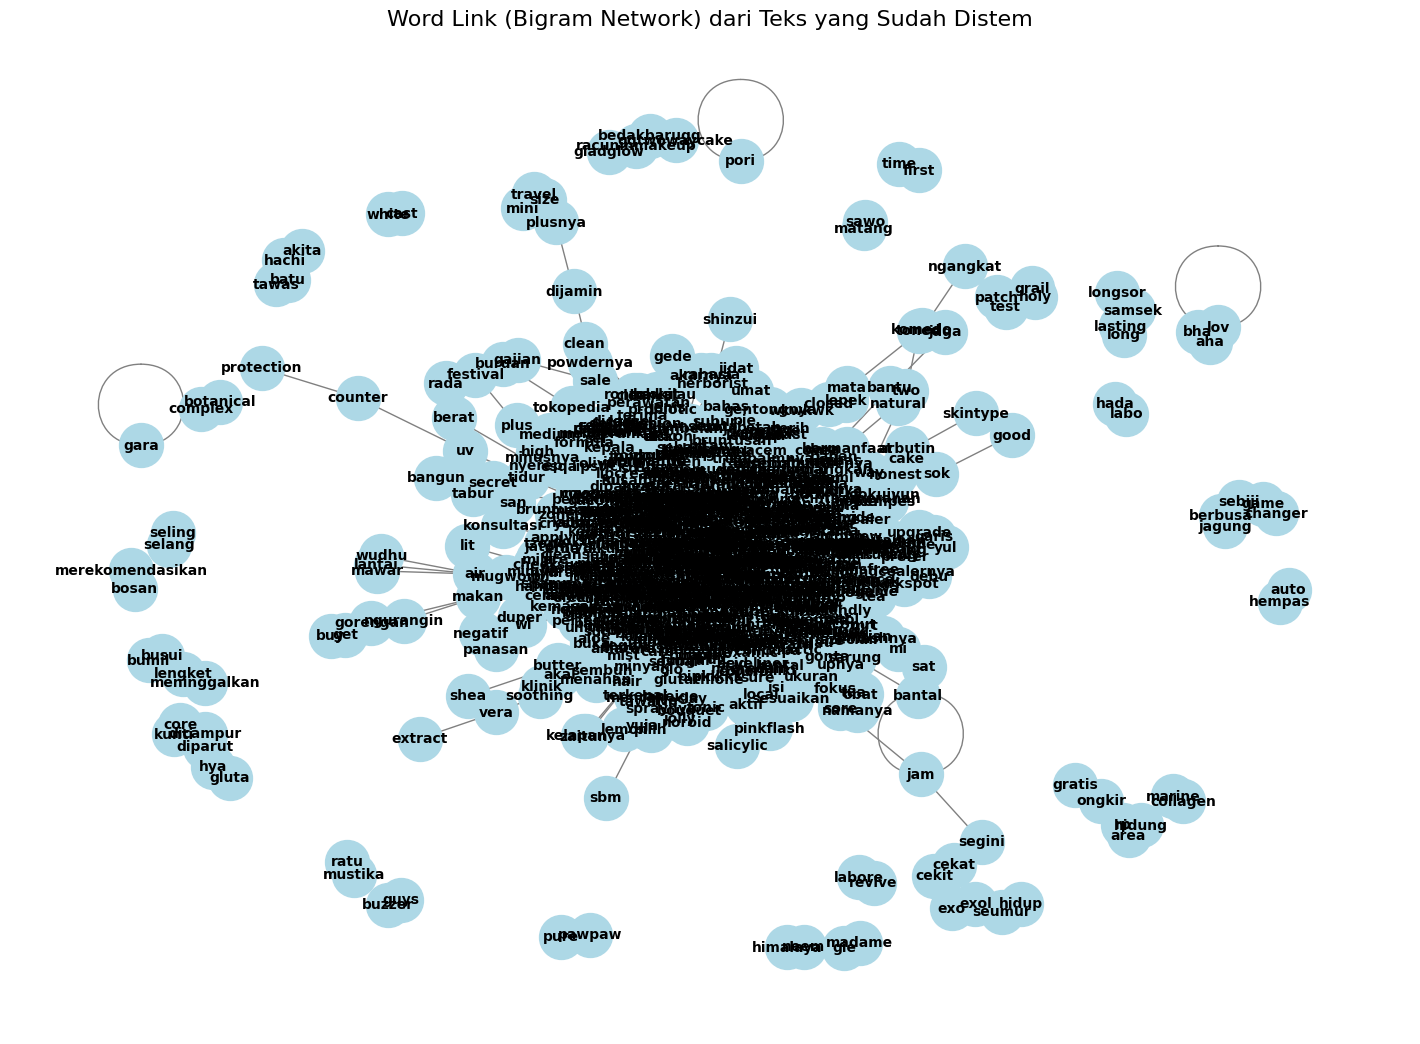

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx
import matplotlib.pyplot as plt

# Ambil daftar teks dari kolom 'tokenize_text' yang labelnya 1, ubah ke lowercase
texts = df[df['label'] == 1]['tokenize_text'].astype(str).str.lower().tolist()

# Ekstraksi bigram dengan CountVectorizer (hanya bigram yang muncul minimal 2 kali)
vectorizer = CountVectorizer(ngram_range=(2, 2), min_df=2)
X = vectorizer.fit_transform(texts)
bigrams = vectorizer.get_feature_names_out()

# Pisahkan setiap bigram menjadi pasangan kata
edges = [tuple(b.split()) for b in bigrams]

# Buat graph dari bigram
G = nx.Graph()
G.add_edges_from(edges)

# Visualisasi jaringan bigram
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.5, seed=42)  # posisi node
nx.draw(
    G, pos,
    with_labels=True,
    node_color='lightblue',
    edge_color='gray',
    node_size=1000,
    font_size=10,
    font_weight='bold'
)
plt.title("Word Link (Bigram Network) dari Teks yang Sudah Distem", fontsize=16)
plt.show()


In [ ]:
# Cek kata apa yang paling banyak punya edge (koneksi).
import networkx as nx

centrality = nx.degree_centrality(G)
sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:10]

[('pakai', 0.2573839662447257),
 ('banget', 0.16983122362869196),
 ('nya', 0.08966244725738395),
 ('bagus', 0.08860759493670885),
 ('kak', 0.0780590717299578),
 ('kalo', 0.07489451476793248),
 ('sih', 0.06962025316455696),
 ('serum', 0.06434599156118143),
 ('coba', 0.06223628691983122),
 ('bikin', 0.06012658227848101)]

Pengguna Twitter banyak membicarakan pengalaman memakai produk, memberikan penilaian positif atau ekspresif, dan menyebut jenis produk seperti serum. Hal ini memberikan gambaran bahwa percakapan tentang skincare lokal di media sosial bersifat personal, interaktif, dan cenderung positif.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


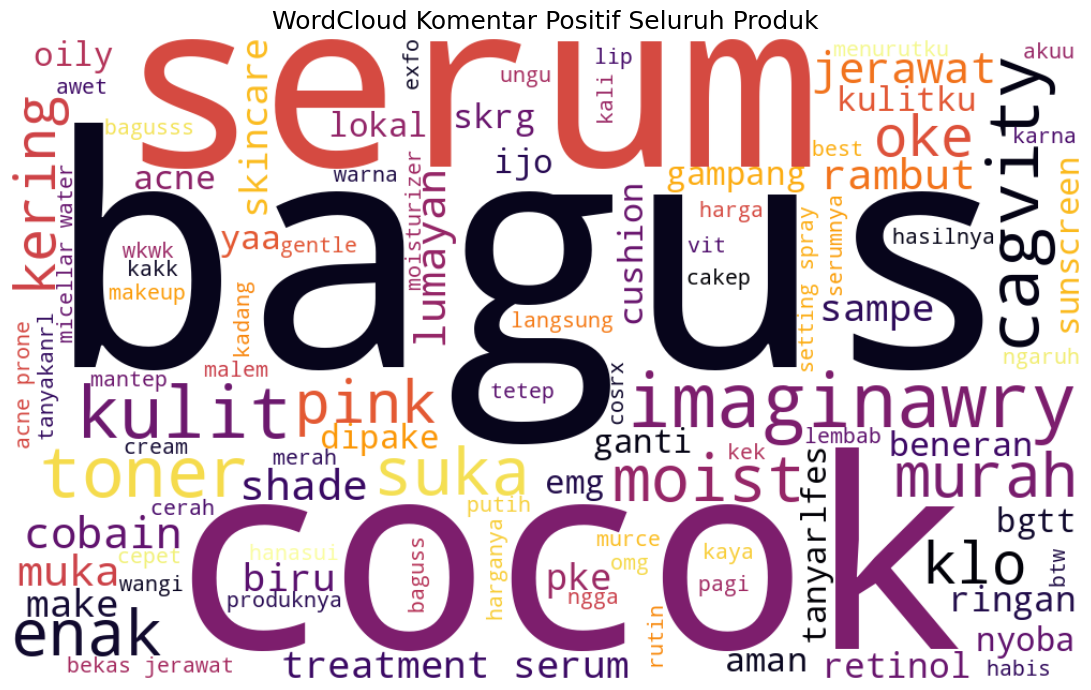

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import nltk
import string

# Unduh resource NLTK jika belum ada
nltk.download('punkt')
nltk.download('stopwords')

# Stopwords default + tambahan kata informal
stop_words = set(stopwords.words('indonesian'))
custom_stopwords = stop_words.update({
    'pakai', 'banget', 'kak', 'nya', 'bgt', 'udh', 'gak', 'aja', 'kayak', 'rontok','gue','nama',
    'deh', 'udah', 'dah', 'nih', 'min', 'dong', 'si', 'buat', 'kalo', 'biar','cantik','scarlett','indonesia', "the",
    'juga', 'jadi', 'emang', 'tuh', 'krn', 'ga', 'yg', 'tp', 'sih', 'aku', 'kayaknya', "kamu", "masi", "gitu", "gua", "coba", "blm",
    'di', 'ini', 'itu', 'karena','pas','tertarik','brand','produk', "tau", "ba", "amp", "kagak", "trs", 'bgt', 'pake',
    'pakaiin', 'pake', 'masih', 'cuma', 'lagi', 'mau', 'dulu', 'sama', 'dan', "abis", "beli", "bikin", 'nder', 'cem', 'ceman',
    'studio', 'tropik', 'somethinc', 'avoskin', 'Scarlett', 'whitening', 'azarine', 'emina', 'wardah', 'teratu',
    'Elsheskin', 'whitelab', 'MS', 'glow', 'Truetoskin', 'npure', 'sariayu', 'lacoco', 'mineral', 'botanica', 'glad', 'to', 'Glow',
    'viva', 'dear', 'Me', 'beauty', 'purbasari', 'facetology', 'true', 'to', 'skin', 'ms', 'skintific', 'emina', 'elsheskin'
})


# Fungsi preprocessing
def preprocess(text):
    tokens = word_tokenize(str(text).lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words and len(t) > 2]
    return ' '.join(tokens)

# Filter komentar Positif
df_pos = df[df['label'] == 1].copy()
df_pos['clean_text'] = df_pos['full_text'].apply(preprocess)

# Gabungkan semua komentar menjadi satu teks panjang
all_neg_text = ' '.join(df_pos['clean_text'])

# Generate WordCloud
wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color='white',
    max_words=100,
    colormap='inferno'
).generate(all_neg_text)

# Tampilkan
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud Komentar Positif Seluruh Produk", fontsize=18)
plt.tight_layout()
plt.show()


Word cloud ini menunjukkan bahwa komentar positif paling sering menyebutkan kata-kata seperti "bagus", "cocok", dan "serum", yang artinya banyak pengguna merasa produk skincare yang mereka coba sesuai dan memberi hasil baik, terutama serum. Nama akun yang sering muncul seperti **Imaginawry dan Cagvity**,  menunjukkan bahwa mereka memiliki reputasi yang baik di kalangan pengguna.

##### Analisis Sentimen Positif Lanjutan

Dari hasil analisis sentimen terhadap 21 brand skincare lokal, **Sariayu** jadi brand yang paling banyak mendapat komentar positif dibandingkan yang lain.

Untuk melihat lebih jauh seperti apa bentuk sentimen positifnya, saya juga menganalisis word cloud dari komentar-komentar positif yang menyebut nama Sariayu secara langsung.

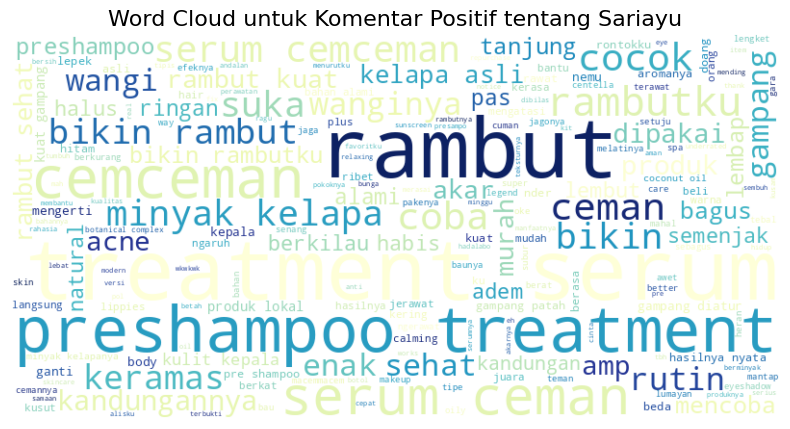

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Tambahkan stopwords kustom
custom_stopwords = set(STOPWORDS)
custom_stopwords.update([
    'pakai', 'banget', 'kak', 'nya', 'bgt', 'udh', 'gak', 'aja', 'udh', 'kayak','rontok',
    'deh', 'udah', 'dah', 'nih', 'min', 'dong', 'si', 'buat', 'kalo', 'biar','sari ayu',
    'juga', 'jadi', 'emang', 'tuh', 'dong', 'min', 'krn', 'nya', 'ga', 'yg', 'sariayu',
    'tp', 'sih', 'aku', 'mu', 'di', 'ini', 'itu', 'karena','gue', 'tau', 'mengasih', 'iya',
    'finally','benaran','loh','kasih','beb', 'kali','seminggu'
])

# Filter data hanya untuk komentar positif tentang Sariayu
text_wc = ' '.join([
    ' '.join(tokens)
    for tokens in df[(df['product'] == 'sariayu') & (df['label'] == 1)]['tokenize_text'].dropna()
])

# Buat WordCloud dengan stopwords kustom
wc = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='YlGnBu',
    stopwords=custom_stopwords
).generate(text_wc)

# Tampilkan
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk Komentar Positif tentang Sariayu', fontsize=16)
plt.show()


Produk Sariayu paling banyak diapresiasi untuk perawatan rambut, terutama **"preshampoo", "treatment", dan "serum"**. Banyak yang menyebut **"wanginya", "cocok"** di rambut, serta membuat rambut jadi lebih **"sehat", "lembap", dan "halus"**. Kata seperti **"rutin", "keramas", dan "minyak kelapa"** juga sering muncul, menandakan kebiasaan dan bahan alami jadi nilai plus bagi pengguna.

In [ ]:
# Filter data hanya untuk komentar positif pada brand Sariayu
sariayu_positif = df[(df['label'] == 1) & (df['product'].str.lower() == 'sariayu')]

# Tampilkan jumlah dan beberapa komentar sebagai contoh
print(f"Total komentar positif untuk Sariayu: {len(sariayu_positif)}\n")

# Menampilkan 10 komentar pertama
print(sariayu_positif[['full_text','tweet_url']].head(10))  # ganti 'text' dengan nama kolom komentar asli jika berbeda


Total komentar positif untuk Sariayu: 226

                                             full_text  \
892                    @cagvity sariayu acne bagus bgt   
894  @tanyakanrl Sariayu soya been nder 6k an yg mu...   
897  @ppawspatroll Sariayu OH MY GOD ini underrated...   
898                                @cagvity Sariayu!!!   
900  @cagvity Aku dah bertahun pake sariayu acne fa...   
902  @cagvity Sariayu yg anti acne sm yg brightenin...   
903  @onlyhcan Sariayu mawar suka banget sama bauny...   
907                   @cagvity Masih stay Sariayu Acne   
908  @cagvity Sariayu yang centella Dari awal kenak...   
909  @cagvity kalau aku pake sariayu yang ijo itu n...   

                                             tweet_url  
892  https://x.com/undefined/status/194413248154163...  
894  https://x.com/undefined/status/194403768028913...  
897  https://x.com/undefined/status/194393770777822...  
898  https://x.com/undefined/status/194393581592895...  
900  https://x.com/undefined/stat

##### Analisis Tren Percakapan Harian Terkait Sariayu, Somethinc, dan Dear Me Beauty Selama Juni-Juli 2025

Tiga Produk Ini yaitu: Sariayu, Somethinc, dan Dear Me Beauty
mendapat Proporsi Sentimen Positif Tertinggi
Berdasarkan hasil analisis sentimen terhadap seluruh tweet yang terkumpul, ketiga brand ini menonjol dengan tingkat sentimen positif yang lebih tinggi dibandingkan brand lokal lainnya.

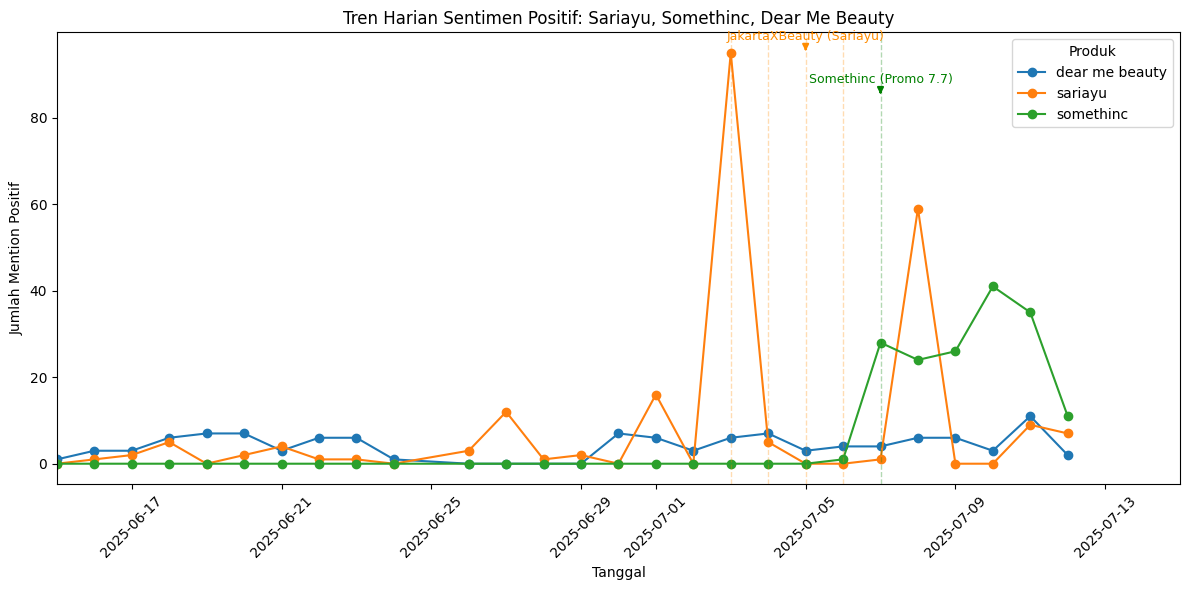

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data sentimen positif
df_pos = df[df['label'] == 1].copy()
df_pos['created_at'] = pd.to_datetime(df_pos['created_at'], errors='coerce')

# Filter produk yang ingin dianalisis
produk_positif = ['sariayu', 'somethinc', 'dear me beauty']
df_pos_filtered = df_pos[df_pos['product'].str.lower().isin(produk_positif)].copy()
df_pos_filtered['date'] = df_pos_filtered['created_at'].dt.date

# Hitung jumlah mention positif harian
trend_pos = df_pos_filtered.groupby(['date', 'product']).size().unstack(fill_value=0)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
trend_pos.plot(marker='o', ax=ax)

# Event dan warna sesuai brand
event_dates = {
    "JakartaXBeauty (Sariayu)": ['2025-07-03', '2025-07-04', '2025-07-05', '2025-07-06'],
    "Somethinc (Promo 7.7)": ['2025-07-07'],
}

brand_colors = {
    'sariayu': 'darkorange',
    'somethinc': 'green',
    'dear me beauty': 'blue'
}

# Tambahkan garis dan anotasi event
for i, (label, dates) in enumerate(event_dates.items()):
    # Deteksi warna sesuai brand
    color = 'black'
    if 'sariayu' in label.lower():
        color = brand_colors['sariayu']
    elif 'somethinc' in label.lower():
        color = brand_colors['somethinc']
    elif 'dear me' in label.lower():
        color = brand_colors['dear me beauty']

    # Garis vertikal
    for d in dates:
        ax.axvline(pd.to_datetime(d), color=color, linestyle='--', linewidth=1, alpha=0.3)

    # Anotasi label event
    mid_date = pd.to_datetime(dates[len(dates)//2])
    y_offset = ax.get_ylim()[1] * (0.95 - 0.1 * i)  # offset agar tidak tumpuk
    ax.annotate(label,
                xy=(mid_date, y_offset),
                xytext=(0, 10),
                textcoords='offset points',
                ha='center',
                fontsize=9,
                color=color,
                arrowprops=dict(arrowstyle='-|>', color=color, lw=1.5))

# Tampilan akhir
plt.title('Tren Harian Sentimen Positif: Sariayu, Somethinc, Dear Me Beauty')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Mention Positif')
plt.xticks(rotation=45)
plt.legend(title='Produk')
ax.set_xlim(pd.to_datetime('2025-06-15'), pd.to_datetime('2025-07-15'))  # 👈 Atur batas sumbu X
plt.tight_layout()
plt.show()



- Sariayu mengalami lonjakan besar pada 3 Juli 2025 karena event JakartaXBeauty, yang mendorong peningkatan tajam dalam sentimen positif.

- Somethinc menunjukkan kenaikan mulai 6 Juli 2025, dipicu oleh promo 7.7, yang berhasil menarik perhatian dan respon positif dari audiene. Selama periode flash sale, Somethinc menunjukkan lonjakan sentimen positif yang signifikan. Hal ini mengindikasikan bahwa meskipun produk dianggap mahal, konsumen tetap antusias membelinya saat diskon berlangsung. Menariknya, komentar yang muncul selama flash sale tetap didominasi oleh tanggapan positif, mencerminkan kepuasan konsumen terhadap kualitas produk meskipun sensitivitas harga tinggi.

- Dear Me Beauty menunjukkan tren stabil tanpa lonjakan berarti, menandakan engagement yang konsisten tapi tanpa dorongan dari event besar.



#### Analisis Sentimen Negatif

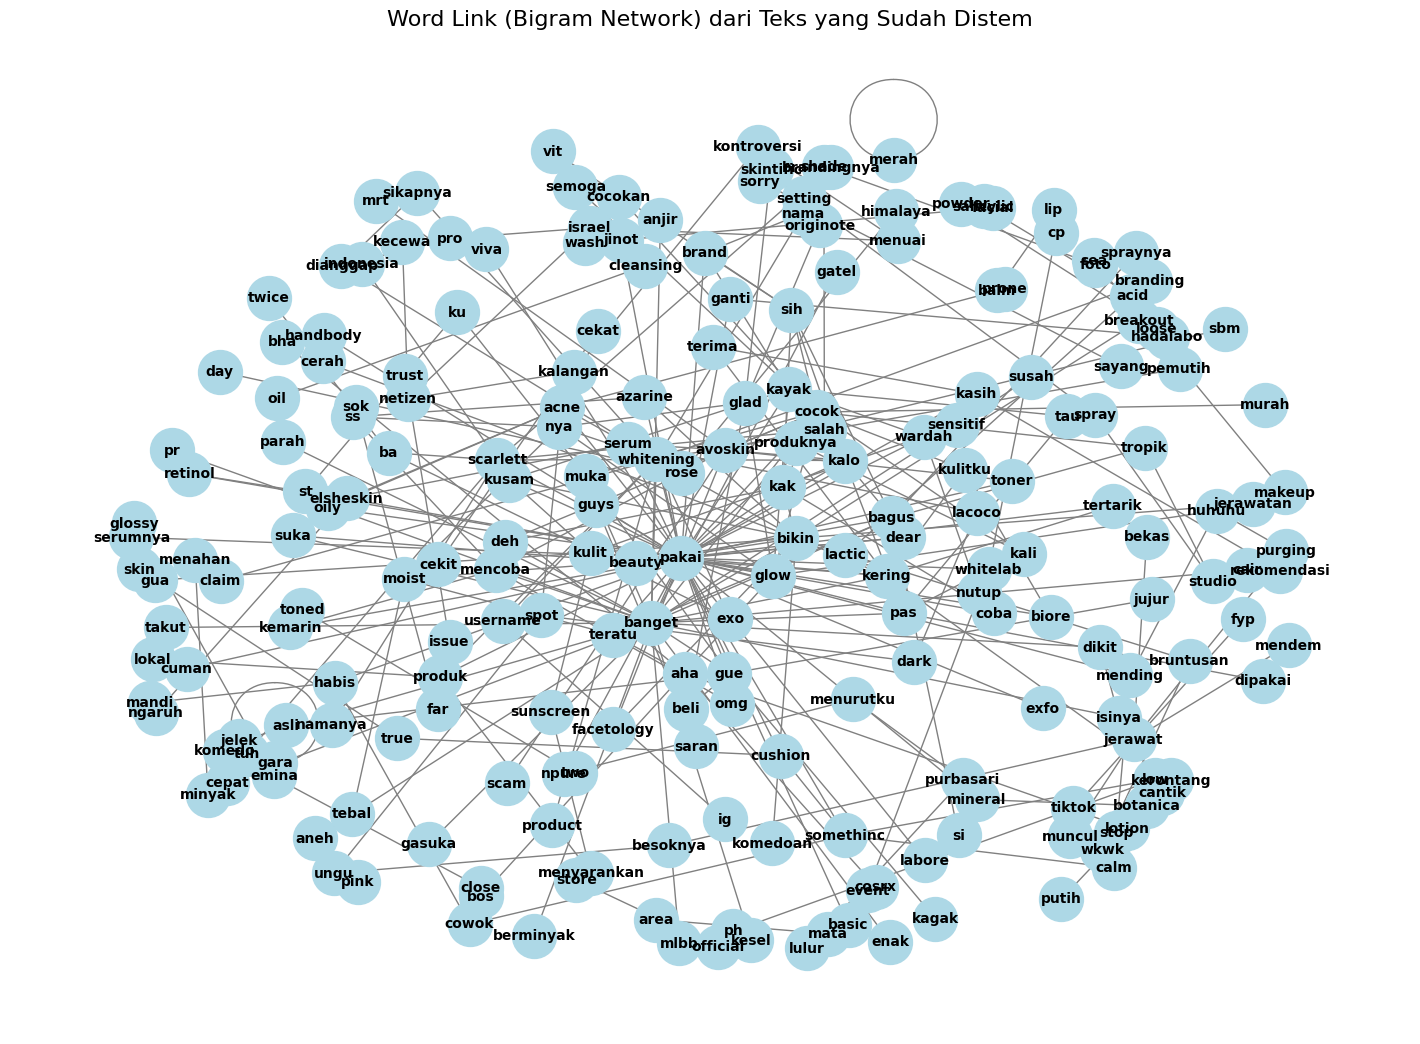

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx
import matplotlib.pyplot as plt

# Ambil daftar teks dari kolom 'tokenize_text' yang labelnya -1, ubah ke lowercase
texts = df[df['label'] == -1]['tokenize_text'].astype(str).str.lower().tolist()

# Ekstraksi bigram dengan CountVectorizer (hanya bigram yang muncul minimal 2 kali)
vectorizer = CountVectorizer(ngram_range=(2, 2), min_df=2)
X = vectorizer.fit_transform(texts)
bigrams = vectorizer.get_feature_names_out()

# Pisahkan setiap bigram menjadi pasangan kata
edges = [tuple(b.split()) for b in bigrams]

# Buat graph dari bigram
G = nx.Graph()
G.add_edges_from(edges)

# Visualisasi jaringan bigram
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.5, seed=42)  # posisi node
nx.draw(
    G, pos,
    with_labels=True,
    node_color='lightblue',
    edge_color='gray',
    node_size=1000,
    font_size=10,
    font_weight='bold'
)
plt.title("Word Link (Bigram Network) dari Teks yang Sudah Distem", fontsize=16)
plt.show()


In [ ]:
# Cek kata apa yang paling banyak punya edge (koneksi).
import networkx as nx

centrality1 = nx.degree_centrality(G)
sorted(centrality1.items(), key=lambda x: x[1], reverse=True)[:10]

[('pakai', 0.22767857142857142),
 ('banget', 0.1294642857142857),
 ('whitening', 0.07142857142857142),
 ('cocok', 0.0625),
 ('bikin', 0.0625),
 ('avoskin', 0.040178571428571425),
 ('kalo', 0.03571428571428571),
 ('scarlett', 0.03571428571428571),
 ('bagus', 0.03571428571428571),
 ('kering', 0.03571428571428571)]

Kata yang paling banyak terhubung adalah "pakai", menunjukkan bahwa pengguna banyak membahas pengalaman langsung mereka saat menggunakan produk. Kata "banget", "whitening", dan "cocok" juga sering muncul, menandakan fokus pengguna pada efektivitas produk, khususnya untuk mencerahkan kulit dan kecocokan dengan kulit mereka.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


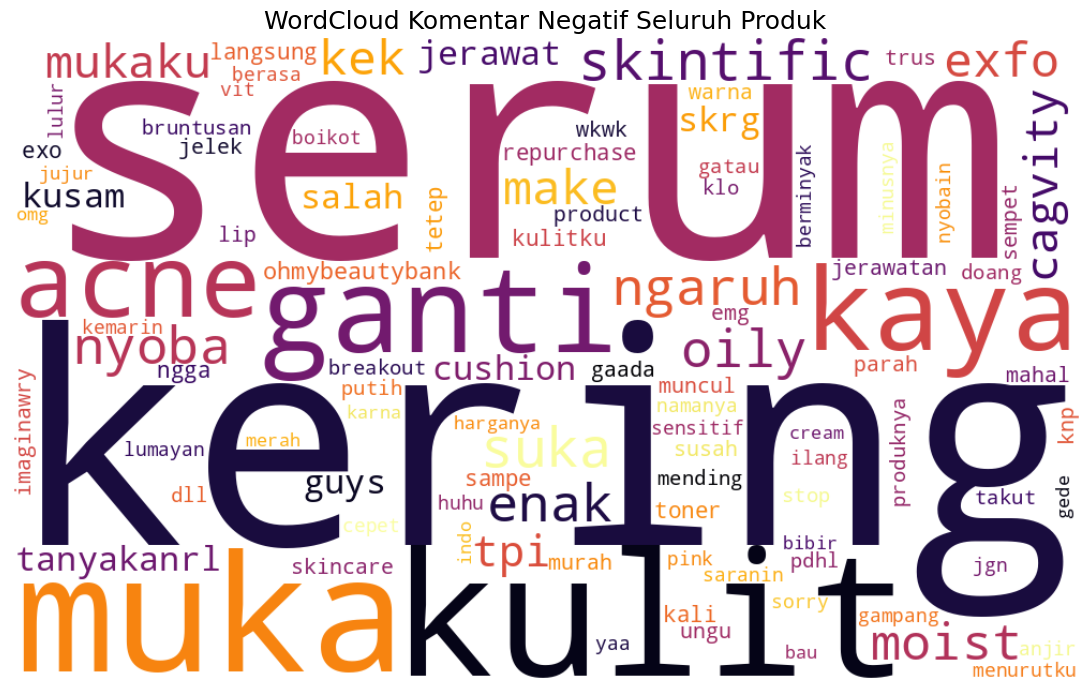

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import nltk
import string

# Unduh resource NLTK jika belum ada
nltk.download('punkt')
nltk.download('stopwords')

# Stopwords default + tambahan kata informal
stop_words = set(stopwords.words('indonesian'))
custom_stopwords = stop_words.update({
    'pakai', 'banget', 'kak', 'nya', 'bgt', 'udh', 'gak', 'aja', 'kayak', 'rontok','gue','nama',
    'deh', 'udah', 'dah', 'nih', 'min', 'dong', 'si', 'buat', 'kalo', 'biar','cantik','scarlett','indonesia', "the", 'bagus', 'cocok',
    'juga', 'jadi', 'emang', 'tuh', 'krn', 'ga', 'yg', 'tp', 'sih', 'aku', 'kayaknya', "kamu", "masi", "gitu", "gua", "coba", "blm",
    'di', 'ini', 'itu', 'karena','pas','tertarik','brand','produk', "tau", "ba", "amp", "kagak", "trs", 'bgt', 'pake',
    'pakaiin', 'pake', 'masih', 'cuma', 'lagi', 'mau', 'dulu', 'sama', 'dan', "abis", "beli", "bikin",
    'studio', 'tropik', 'somethinc', 'avoskin', 'Scarlett', 'whitening', 'azarine', 'emina', 'wardah', 'teratu',
    'elsheskin', 'whitelab', 'MS', 'glow', 'Truetoskin', 'npure', 'sariayu', 'lacoco', 'mineral', 'botanica', 'glad', 'to', 'glow',
    'viva', 'dear', 'me', 'beauty', 'purbasari', 'facetology', 'true', 'to', 'skin', 'ms',
})


# Fungsi preprocessing
def preprocess(text):
    tokens = word_tokenize(str(text).lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words and len(t) > 2]
    return ' '.join(tokens)

# Filter komentar negatif
df_neg = df[df['label'] == -1].copy()
df_neg['clean_text'] = df_neg['full_text'].apply(preprocess)

# Gabungkan semua komentar menjadi satu teks panjang
all_neg_text = ' '.join(df_neg['clean_text'])

# Generate WordCloud
wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color='white',
    max_words=100,
    colormap='inferno'
).generate(all_neg_text)

# Tampilkan
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud Komentar Negatif Seluruh Produk", fontsize=18)
plt.tight_layout()
plt.show()


Keluhan utama konsumen berkaitan dengan efek negatif pada kulit, terutama “kering”, “jerawat”, dan “acne”. Kata seperti “muka”, “serum”, dan “ganti” menunjukkan ketidakpuasan terhadap hasil penggunaan produk dan seringnya pengguna harus mengganti produk karena ketidakcocokan.

##### Analisis Sentimen Negatif Lanjutan

Dari hasil analisis sentimen terhadap 21 brand skincare lokal, **Scarlett Whitening** jadi brand yang paling banyak mendapat komentar negatif dibandingkan yang lain.

Untuk melihat lebih jauh seperti apa bentuk sentimen negatifnya, saya juga menganalisis word cloud dari komentar-komentar negatif yang menyebut nama Scarlett Whitening secara langsung.

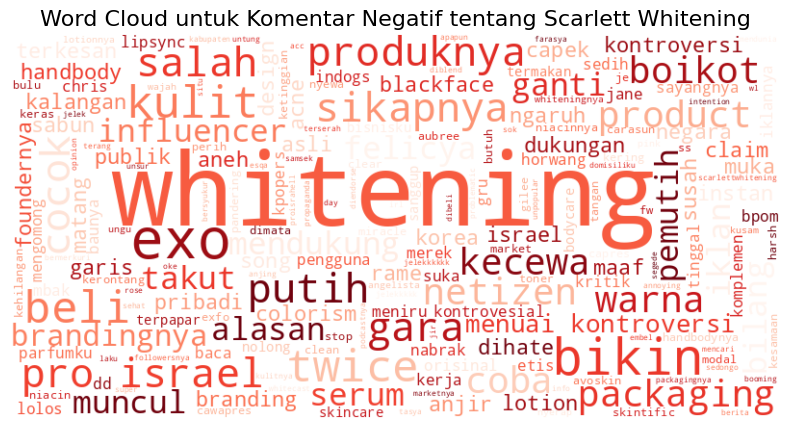

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Tambahkan stopwords kustom
custom_stopwords = set(STOPWORDS)
custom_stopwords.update([
    'pakai', 'banget', 'kak', 'nya', 'bgt', 'udh', 'gak', 'aja', 'kayak', 'rontok','gue','nama',
    'deh', 'udah', 'dah', 'nih', 'min', 'dong', 'si', 'buat', 'kalo', 'biar','cantik','scarlett','indonesia',
    'juga', 'jadi', 'emang', 'tuh', 'krn', 'ga', 'yg', 'tp', 'sih', 'aku', 'mu','scarlett whitening',
    'di', 'ini', 'itu', 'karena','pas','tertarik','brand','produk', "tau", "ba", "amp", "kagak",'ig','sjw','apa',
    'contoh', 'kelompok','orang','gua','sebutkan','samasama','meja','pemahaman','komentar','pendapatnya','oiya',
    'video','dianggap','gaak', 'username', 'twit', 'wota', 'thailand', 'youtube', 'body', 'spam', 'repost', 'block',
    'blockface', 'iya', 'kayak', 'gaaa', 'doang', 'masuk', 'ikut', 'privilege', 'tropis', 'nyangkut', 'pria', 'namanya',
    'bawa','kulift','twitter', 'wkwk','wta','daftar','anything','mah','kayannya','gaaak','kemarin','apasi',
    'dibully', 'akunnya', 'official', 'store', 'disuruh', 'isi', 'kesel', 'mengkritiknya', 'pendapat', 'konflik', 'terkini',
    'kesalahan', 'baliknya', 'simak', 'mengecamnya', 'figur', 'bijak', 'semoga', 'pandangan', 'penggemar', 'marmut', 'berharap',
    'mengunggah', 'dukungannya', 'brandnya', 'qja', 'ideologinya', 'memakai', 'mandi', 'seminggu', 'jujur', 'sekedar', 'hah', 'butut',
    'perubahan', 'dibilas', 'wkwkwk', 'heumz', 'thanks', 'bawain', 'sorry', 'fun', 'fact', 'yelah', 'sengaja', 'keep','scarlet', 'kali','manggil'

]),

# 🔍 Filter data: komentar negatif untuk Scarlett Whitening
text_wc = ' '.join([
    ' '.join(tokens)
    for tokens in df[(df['product'] == 'scarlett') & (df['label'] == -1)]['tokenize_text'].dropna()
])

# Buat WordCloud
wc = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Reds',  # Warna merah untuk menekankan sentimen negatif
    stopwords=custom_stopwords
).generate(text_wc)

# Tampilkan
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk Komentar Negatif tentang Scarlett Whitening', fontsize=16)
plt.show()


Komentar negatif banyak terkait isu di luar kualitas produk, seperti **“sikapnya”, “influencer”, “boikot”, dan “Israel”**, yang menunjukkan adanya kontroversi dan isu etika. Selain itu, juga muncul keluhan soal **“packaging”, “coba”, dan “bikin kecewa”**, menandakan ada juga yang merasa produk tidak sesuai ekspektasi.

In [ ]:
# Filter data hanya untuk komentar negatif pada brand Scarlett Whitening
scarlett_negatif = df[(df['label'] == -1) & (df['product'].str.lower() == 'scarlett')]

# Tampilkan jumlah dan beberapa komentar sebagai contoh
print(f"Total komentar negatif untuk Scarlett: {len(sariayu_positif)}\n")

# Menampilkan 10 komentar pertama
print(scarlett_negatif[['full_text','tweet_url']].head(10))  # ganti 'text' dengan nama kolom komentar asli jika berbeda

Total komentar negatif untuk Scarlett: 226

                                              full_text  \
4755  Gara2 ada yg suka pake handbody scarlett white...   
4757  @reeeaalllll @ketokketokk Dulu TWICE dihate kp...   
4763  @tebakinisyapa Not scarlett agak sedih jane ke...   
4764    wta scarlett whitening masuk daftar boikot kah?   
4769  @su_zumesky Lo tinggal di indogs padahal negar...   
4770  @KkungminCub Dd bukannya cuma bisa jadi Scarle...   
4778  @reorientasi @ohmybeautybank oiya? trus klo sc...   
4780  karena biasa terpapar dengan sjw twitter aku j...   
4781  @tanyakanrl Yang komentar kaya gitu kemakan ik...   
4782  @Centricion scarlett body whitening pun udah g...   

                                              tweet_url  
4755  https://x.com/undefined/status/191715522150940...  
4757  https://x.com/undefined/status/191435332989711...  
4763  https://x.com/undefined/status/182189703106731...  
4764  https://x.com/undefined/status/182077114180114...  
4769  https://x.

##### Tren Harian Sentimen Negatif Produk Lokal: Scarlett, Somethinc, Glad to Glow

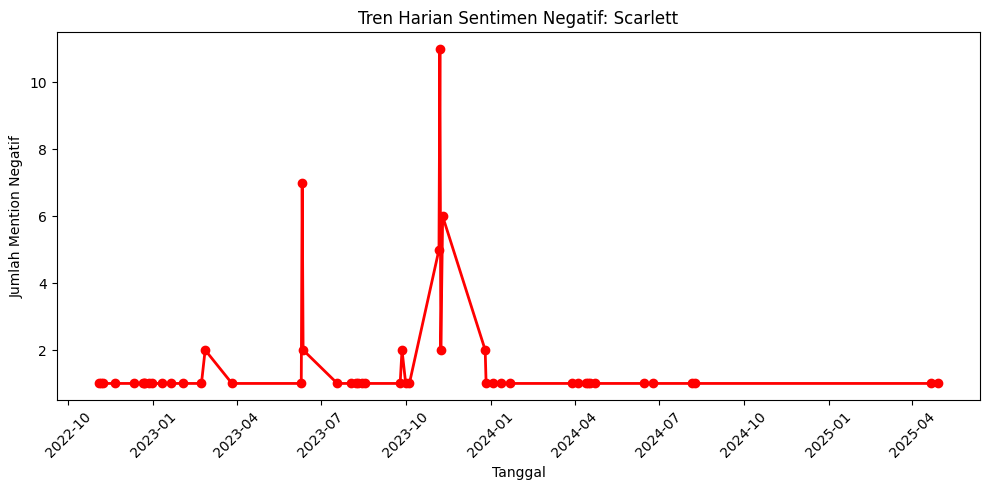

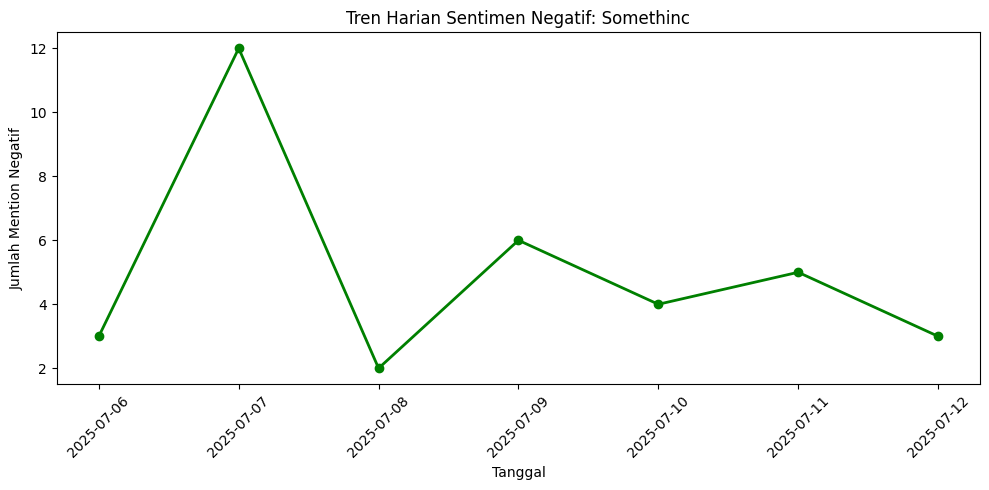

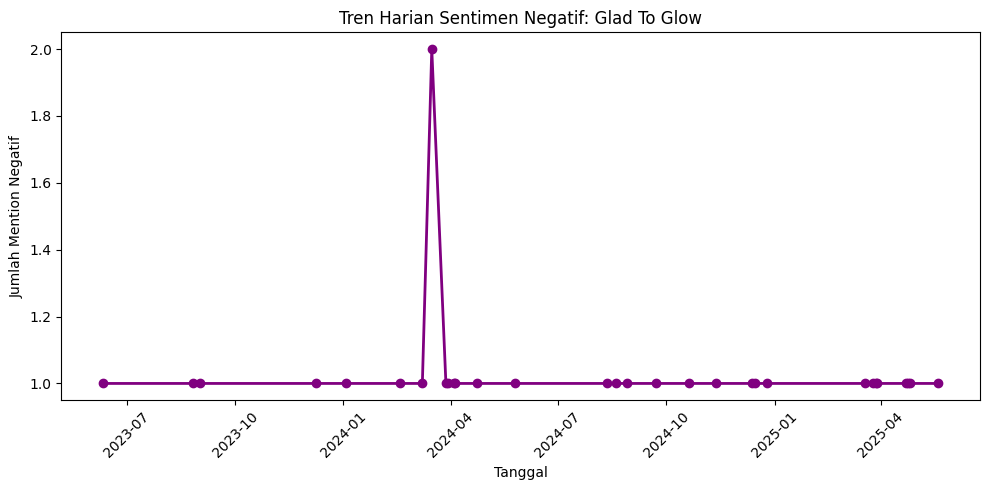

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Konversi waktu & filter sentimen negatif
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df_neg = df[df['label'] == -1].copy()

# Produk dengan sentimen negatif tertinggi
produk_negatif = ['scarlett', 'somethinc', 'glad to glow']
brand_colors = {
    'scarlett': 'red',
    'somethinc': 'green',
    'glad to glow': 'purple'
}

# Event hanya untuk Somethinc karena relevan dengan promo 7.7
event_dates = {
    'scarlett': [],
    'somethinc': [],
    'glad to glow': []
}

# Loop per produk
for produk in produk_negatif:
    df_produk = df_neg[df_neg['product'].str.lower() == produk].copy()
    df_produk['date'] = df_produk['created_at'].dt.date

    trend_produk = df_produk.groupby('date').size()

    # Plot
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(trend_produk.index, trend_produk.values,
            marker='o',
            linestyle='-',
            linewidth=2,
            color=brand_colors[produk],
            label=produk)

    # Garis event (jika ada)
    for d in event_dates.get(produk, []):
        ax.axvline(pd.to_datetime(d), color=brand_colors[produk], linestyle='--', alpha=0.3)
    if event_dates.get(produk):
        mid_date = pd.to_datetime(event_dates[produk][len(event_dates[produk])//2])
        ax.annotate(f"{produk.title()} (Event)",
                    xy=(mid_date, ax.get_ylim()[1]*0.9),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center',
                    fontsize=9,
                    color=brand_colors[produk],
                    arrowprops=dict(arrowstyle='-|>', color=brand_colors[produk]))

    # Tampilan akhir
    plt.title(f'Tren Harian Sentimen Negatif: {produk.title()}')
    plt.xlabel('Tanggal')
    plt.ylabel('Jumlah Mention Negatif')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


- Scarlett
Terdapat lonjakan jumlah mention negatif pada Oktober hingga Desember 2023, dengan puncak tertinggi lebih dari 10 mention dalam satu hari. Di luar periode tersebut, jumlah mention negatif umumnya berada di angka 1 hingga 2.

- Somethinc
Mention negatif tertinggi terjadi pada 7 Juli 2025 sebanyak 12 mention. Setelah itu, jumlah mention fluktuatif antara 2 hingga 6 mention per hari hingga 12 Juli 2025.

- Glad To Glow
Jumlah mention negatif konsisten sebanyak 1 mention per hari, kecuali pada awal April 2024 yang meningkat menjadi 2 mention dalam satu hari. Selebihnya tidak ada lonjakan signifikan.

In [ ]:
# --- 1. Konversi dan filter ulang seperti sebelumnya
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
produk_negatif = ['scarlett', 'somethinc', 'glad to glow']
df_neg = df[
    (df['label'] == -1) &
    (df['product'].str.lower().isin(produk_negatif))
].copy()
df_neg['date'] = df_neg['created_at'].dt.date

# --- 2. Hitung jumlah mention negatif per hari per produk
trend_neg = df_neg.groupby(['date', 'product']).size().reset_index(name='count')

# --- 3. Cari tanggal puncak untuk masing-masing produk
puncak = trend_neg.loc[trend_neg.groupby('product')['count'].idxmax()]
print("Tanggal puncak sentimen negatif:")
print(puncak)

Tanggal puncak sentimen negatif:
          date       product  count
45  2024-03-16  glad to glow      2
33  2023-11-07      scarlett     11
82  2025-07-07     somethinc     12


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import nltk
from wordcloud import STOPWORDS # Import STOPWORDS

# Download resource jika belum
nltk.download('punkt')
nltk.download('stopwords')

# Stopwords dasar + tambahan kata-kata informal/umum yang tidak bermakna
# Tambahkan stopwords kustom
custom_stopwords = set(STOPWORDS)
custom_stopwords.update([
    'pakai', 'banget', 'kak', 'nya', 'bgt', 'udh', 'gak', 'aja', 'kayak', 'rontok','gue','nama',
    'deh', 'udah', 'dah', 'nih', 'min', 'dong', 'si', 'buat', 'kalo', 'biar','cantik','scarlett','indonesia',
    'juga', 'jadi', 'emang', 'tuh', 'krn', 'ga', 'yg', 'tp', 'sih', 'aku', 'kayaknya', "kamu",
    'di', 'ini', 'itu', 'karena','pas','tertarik','brand','produk', "tau", "ba", "amp", "kagak", "aku",
    'udah', 'gitu', 'gue', 'aku', 'kamu', 'sih', 'ya', 'yg', 'banget', 'bgt',
    'di', 'ke', 'dari', 'aja', 'dong', 'nih', 'kayak', 'sama', 'emang', 'cuma',
    'masih', 'udah', 'dan', 'juga', 'itu', 'ini', 'buat', 'karena', 'dulu',
    'lagi', 'kalo', 'mau', 'tau', 'kayak', 'pakai', 'pakaiin', 'produk', 'pake'
])

# Fungsi preprocessing
def preprocess(text):
    tokens = word_tokenize(str(text).lower())
    # Fix: Changed `stop_words` to `custom_stopwords`
    tokens = [t for t in tokens if t.isalpha() and t not in custom_stopwords and len(t) > 2]
    return ' '.join(tokens)

# Buat kolom clean_text baru (ulang agar bersih)
df['clean_text'] = df['full_text'].apply(preprocess)

# LDA per tanggal puncak sentimen negatif
for i, row in puncak.iterrows():
    produk = row['product']
    tanggal = row['date']

    komentar = df_neg[
        (df_neg['product'] == produk) &
        (df_neg['date'] == tanggal)
    ]['clean_text'].tolist()

    print(f"\n🧠 LDA Topik untuk '{produk}' pada tanggal {tanggal} (jumlah komentar: {len(komentar)}):")

    if len(komentar) < 5:
        print("⚠️ Terlalu sedikit data untuk analisis LDA.")
        continue

    vectorizer = CountVectorizer(max_df=0.95, min_df=2)
    X = vectorizer.fit_transform(komentar)

    lda = LatentDirichletAllocation(n_components=2, random_state=42)
    lda.fit(X)

    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-6:-1]]
        print(f"  🔹 Topik {topic_idx+1}: {', '.join(top_words)}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



🧠 LDA Topik untuk 'glad to glow' pada tanggal 2024-03-16 (jumlah komentar: 2):
⚠️ Terlalu sedikit data untuk analisis LDA.

🧠 LDA Topik untuk 'scarlett' pada tanggal 2023-11-07 (jumlah komentar: 11):
  🔹 Topik 1: gue, scarlett, produk, yg, pernah
  🔹 Topik 2: kulit, scarlett, emang, sama, ke

🧠 LDA Topik untuk 'somethinc' pada tanggal 2025-07-07 (jumlah komentar: 12):
  🔹 Topik 1: somethinc, di, udh, bgt, gitu
  🔹 Topik 2: somethinc, aku, kalo, bgt, apa


In [ ]:
nltk_stopwords = set(stopwords.words('indonesian')) | set(stopwords.words('english'))
all_stopwords = nltk_stopwords.union(custom_stopwords)

#### Analisis Sentimen Netral

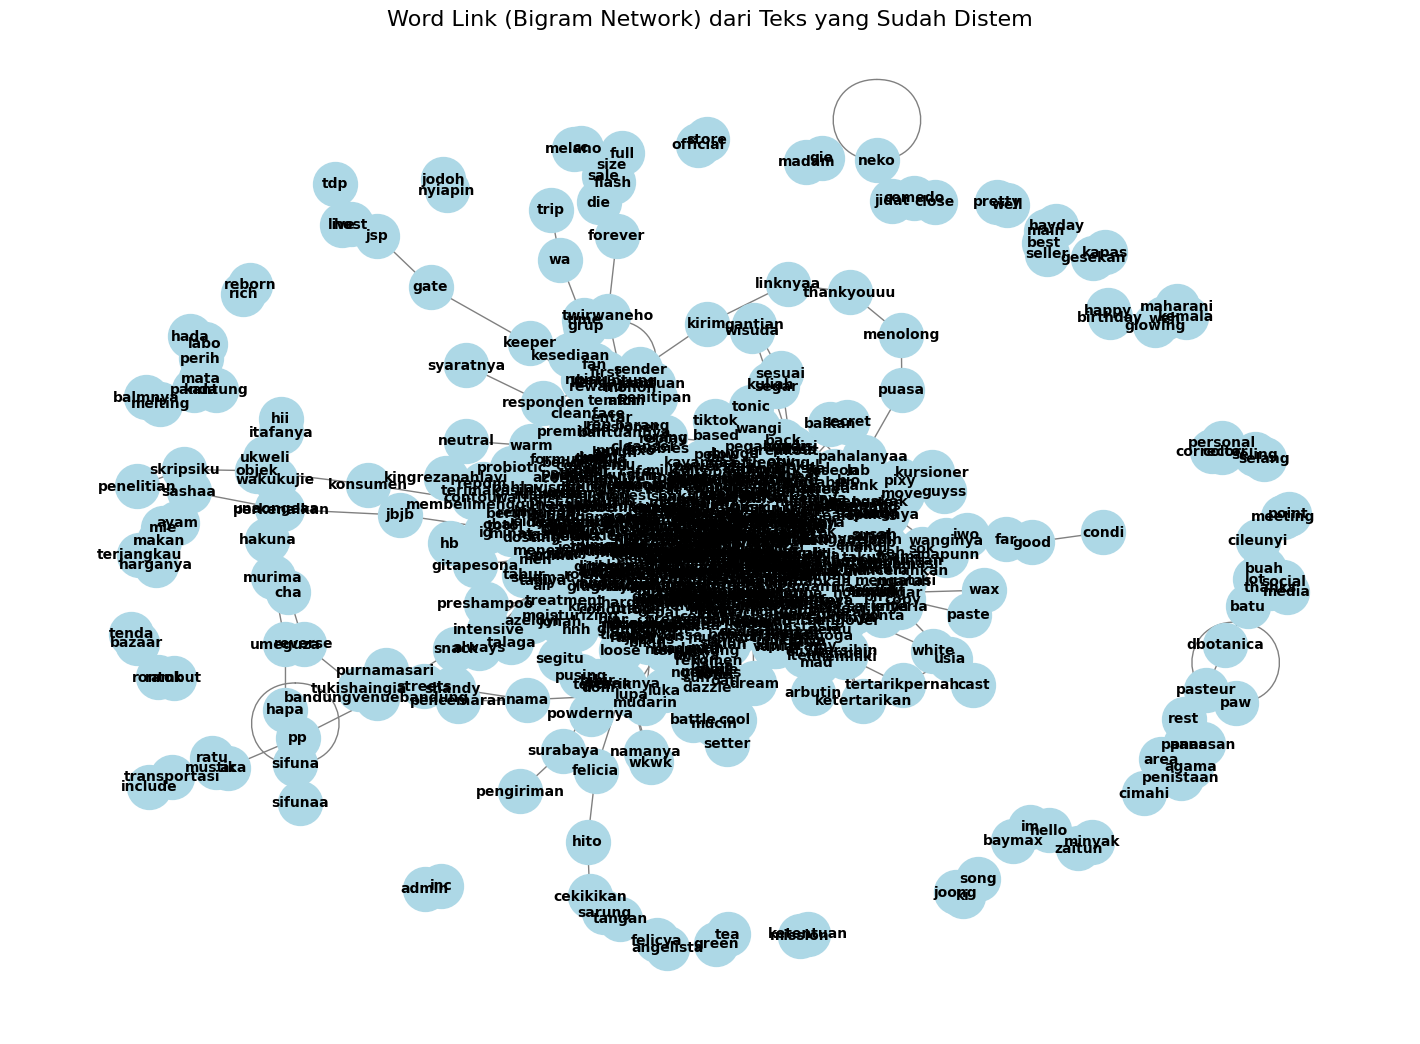

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx
import matplotlib.pyplot as plt

# Ambil daftar teks dari kolom 'tokenize_text' yang labelnya 0, ubah ke lowercase
texts = df[df['label'] == 0]['tokenize_text'].astype(str).str.lower().tolist()

# Ekstraksi bigram dengan CountVectorizer (hanya bigram yang muncul minimal 2 kali)
vectorizer = CountVectorizer(ngram_range=(2, 2), min_df=2)
X = vectorizer.fit_transform(texts)
bigrams = vectorizer.get_feature_names_out()

# Pisahkan setiap bigram menjadi pasangan kata
edges = [tuple(b.split()) for b in bigrams]

# Buat graph dari bigram
G = nx.Graph()
G.add_edges_from(edges)

# Visualisasi jaringan bigram
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.5, seed=42)  # posisi node
nx.draw(
    G, pos,
    with_labels=True,
    node_color='lightblue',
    edge_color='gray',
    node_size=1000,
    font_size=10,
    font_weight='bold'
)
plt.title("Word Link (Bigram Network) dari Teks yang Sudah Distem", fontsize=16)
plt.show()


In [ ]:
# Cek kata apa yang paling banyak punya edge (koneksi).
import networkx as nx

centrality2 = nx.degree_centrality(G)
sorted(centrality2.items(), key=lambda x: x[1], reverse=True)[:10]

[('pakai', 0.16333725029377202),
 ('kak', 0.13043478260869565),
 ('glow', 0.0799059929494712),
 ('nya', 0.07168037602820211),
 ('wardah', 0.06462984723854288),
 ('serum', 0.062279670975323144),
 ('coba', 0.06110458284371328),
 ('skin', 0.05640423031727379),
 ('kalo', 0.055229142185663924),
 ('viva', 0.05405405405405405)]

Kata yang paling sering muncul berpasangan (bigram) dalam teks adalah **"pakai", diikuti oleh "kak", "glow", "nya", "wardah", dan "serum"**. Ini menunjukkan bahwa dalam percakapan atau ulasan, pengguna banyak membahas pengalaman memakai produk (kata “pakai”), sering menyapa dengan **“kak”**, serta banyak menyebut istilah terkait perawatan kulit seperti **“glow”, “wardah”, “serum”, dan “skin”**.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


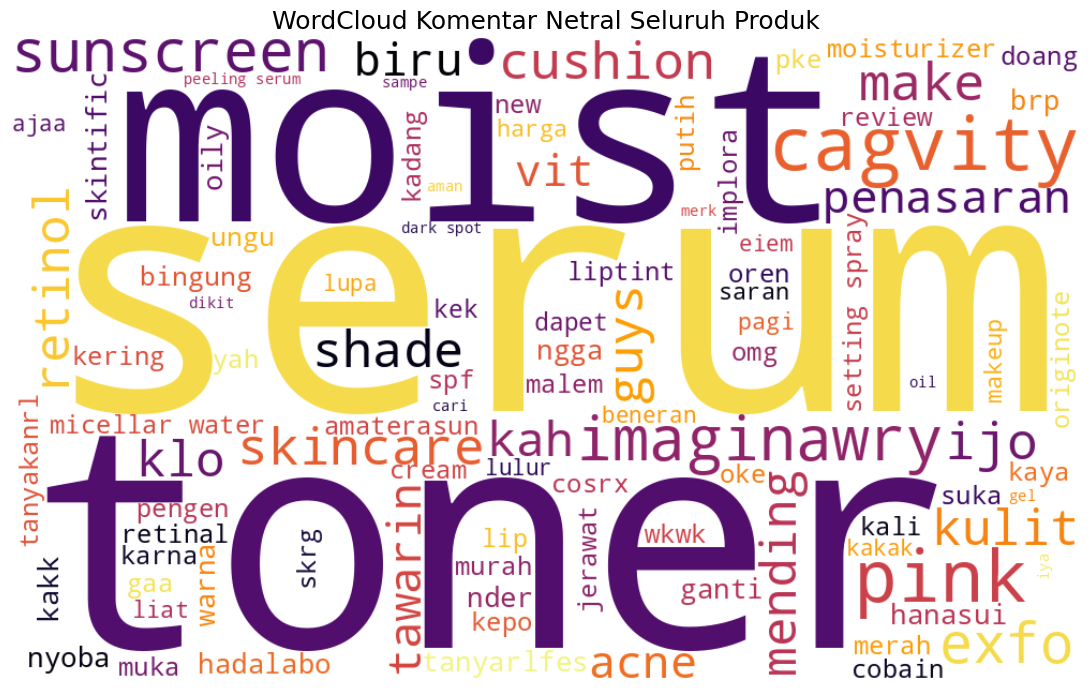

In [ ]:
# Unduh resource NLTK jika belum ada
nltk.download('punkt')
nltk.download('stopwords')

# Stopwords default + tambahan kata informal
stop_words = set(stopwords.words('indonesian'))
custom_stopwords = stop_words.update({
    'pakai', 'banget', 'kak', 'nya', 'bgt', 'udh', 'gak', 'aja', 'kayak', 'rontok','gue','nama',
    'deh', 'udah', 'dah', 'nih', 'min', 'dong', 'si', 'buat', 'kalo', 'biar','cantik','scarlett','indonesia', "the", 'bagus', 'cocok',
    'juga', 'jadi', 'emang', 'tuh', 'krn', 'ga', 'yg', 'tp', 'sih', 'aku', 'kayaknya', "kamu", "masi", "gitu", "gua", "coba", "blm",
    'di', 'ini', 'itu', 'karena','pas','tertarik','brand','produk', "tau", "ba", "amp", "kagak", "trs", 'bgt', 'pake',
    'pakaiin', 'pake', 'masih', 'cuma', 'lagi', 'mau', 'dulu', 'sama', 'dan', "abis", "beli", "bikin",
    'studio', 'tropik', 'somethinc', 'avoskin', 'Scarlett', 'whitening', 'azarine', 'emina', 'wardah', 'teratu',
    'elsheskin', 'whitelab', 'MS', 'glow', 'Truetoskin', 'npure', 'sariayu', 'lacoco', 'mineral', 'botanica', 'glad', 'to', 'Glow',
    'viva', 'dear', 'me', 'beauty', 'purbasari', 'facetology', 'true', 'to', 'skin', 'ms', 'yaa', 'akuu'
})


# Fungsi preprocessing
def preprocess(text):
    tokens = word_tokenize(str(text).lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words and len(t) > 2]
    return ' '.join(tokens)

# Filter komentar Netral
df_net = df[df['label'] == 0].copy()
df_net['clean_text'] = df_net['full_text'].apply(preprocess)

# Gabungkan semua komentar menjadi satu teks panjang
all_net_text = ' '.join(df_net['clean_text'])

# Generate WordCloud
wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color='white',
    max_words=100,
    colormap='inferno'
).generate(all_net_text)

# Tampilkan
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud Komentar Netral Seluruh Produk", fontsize=18)
plt.tight_layout()
plt.show()


Wordcloud komentar netral menunjukkan bahwa pengguna banyak menyebut jenis produk (seperti toner, serum, moist), kandungan (seperti retinol, acne), warna kemasan (pink, ijo, biru), serta membahas pengalaman mencoba produk, nama brand, dan kondisi kulit, namun tanpa muatan emosional yang jelas.

##### Analisis Sentimen Netral Lanjutan

Dari hasil analisis sentimen terhadap 21 brand skincare lokal, **Lacoco** jadi brand yang paling banyak mendapat komentar netral dibandingkan yang lain.

Untuk melihat lebih jauh seperti apa bentuk sentimen netralnya, saya juga menganalisis word cloud dari komentar-komentar netral yang menyebut nama Lacoco secara langsung.

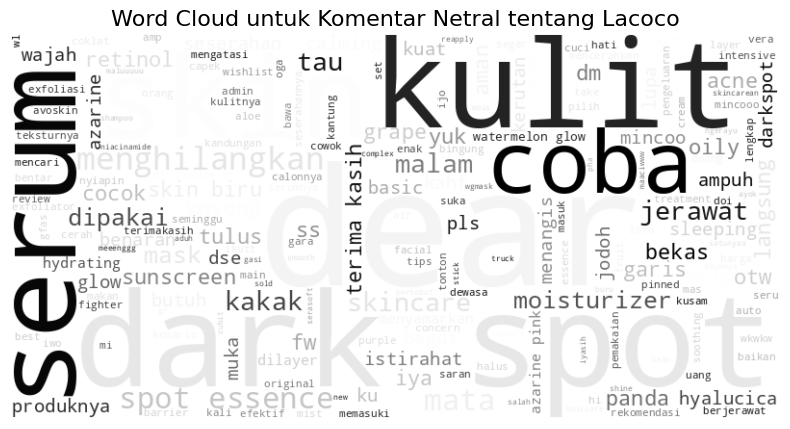

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Tambahkan stopwords kustom
custom_stopwords = set(STOPWORDS)
custom_stopwords.update([
    'pakai', 'banget', 'kak', 'nya', 'bgt', 'udh', 'gak', 'aja', 'kayak', 'rontok', 'gue', 'whitening',
    'deh', 'udah', 'dah', 'nih', 'min', 'dong', 'si', 'buat', 'kalo', 'biar', 'cantik', 'scarlett', 'indonesia',
    'juga', 'jadi', 'emang', 'tuh', 'krn', 'ga', 'yg', 'tp', 'sih', 'aku', 'mu', 'scarlett whitening',
    'di', 'ini', 'itu', 'karena', 'pas', 'tertarik', 'brand', 'produk', 'lacoco','ml','besok','hayday','keh'
])

# 🔍 Filter data: komentar netral untuk Lacoco
text_wc = ' '.join([
    ' '.join(tokens)
    for tokens in df[(df['product'] == 'lacoco') & (df['label'] == 0)]['tokenize_text'].dropna()
])

# Buat WordCloud
wc = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Greys',  # Warna netral
    stopwords=custom_stopwords
).generate(text_wc)

# Tampilkan
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk Komentar Netral tentang Lacoco', fontsize=16)
plt.show()


Word cloud menunjukkan bahwa komentar netral tentang Lacoco banyak membahas kata seperti **"dear", "kulit", "dark spot", "coba", "serum", dan "mata"**. Selain itu, muncul juga istilah terkait perawatan seperti **"moisturizer", "jerawat", dan "essence"**, menandakan fokus komentar pada manfaat produk untuk perawatan kulit wajah, khususnya masalah noda hitam dan area mata.

In [ ]:
# Filter data hanya untuk komentar netral pada brand lacoco
lacoco_netral = df[(df['label'] == 0) & (df['product'].str.lower() == 'lacoco')]

# Tampilkan jumlah dan beberapa komentar sebagai contoh
print(f"Total komentar netral untuk Lacoco: {len(lacoco_netral)}\n")

# Tampilkan seluruh kolom teks tanpa dipotong
pd.set_option('display.max_colwidth', None)

# Menampilkan 10 komentar pertama
print(lacoco_netral[['full_text','tweet_url']].sample(5))  # ganti 'text' dengan nama kolom komentar asli jika berbeda


Total komentar netral untuk Lacoco: 244

                                                                                                   full_text  \
1467                                                               @ykdsix Mana kemarin sempet sold lama yaa   
1722  @lacoco_id dear lacoco kalau mukanya tipe oily dan mau hilangin beruntusan apa ya produk paling tepat?   
1726                 @lacoco_id Dear Lacoco produk apa aja yang bagus buat ngembaliin skin barrier yg rusak?   
1529                                                                    @flwreon Tinggi ganteng lucuuu lagi    
1479                                                              @jualanbeb07 lacoco grape masih ada ga kak   

                                               tweet_url  
1467  https://x.com/undefined/status/1943257346945560835  
1722  https://x.com/undefined/status/1935774724925399317  
1726  https://x.com/undefined/status/1935736236670689341  
1529  https://x.com/undefined/status/1940237283611

###Analisis Engagement

####Top 5 Akun yang Paling Sering Dimention

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# 1. Filter akun mention yang valid
filtered_mentions = df['in_reply_to_screen_name']
filtered_mentions = filtered_mentions[
    filtered_mentions.notna() & (filtered_mentions.str.strip() != '(kosong)')
]

# 2. Ambil 5 akun yang paling sering dimention
mention_counts = filtered_mentions.value_counts().head(5)

# 3. Urutkan dari paling banyak ke paling sedikit (kiri ke kanan)
mention_counts = mention_counts.sort_values(ascending=False)

# 4. Posisi titik horizontal dan atribut visual
x_positions = list(range(len(mention_counts)))  # 0 - 9
y_positions = [0] * len(mention_counts)
colors = px.colors.qualitative.Plotly
node_color = [colors[i % len(colors)] for i in range(len(mention_counts))]
node_size = [8 + count for count in mention_counts]
node_text = [f"{name} ({mention_counts[name]} mentions)" for name in mention_counts.index]

# 5. Buat scatter trace
node_trace = go.Scatter(
    x=x_positions,
    y=y_positions,
    mode='markers+text',
    text=mention_counts.index,
    textposition="top center",
    marker=dict(
        size=node_size,
        color=node_color,
        line_width=0
    ),
    hovertext=node_text,
    hoverinfo='text'
)

# 6. Visualisasi
fig = go.Figure(data=[node_trace],
                layout=go.Layout(
                    title='Top 5 Akun yang Paling Sering Dimention',
                    showlegend=False,
                    hovermode='closest',
                    width=700,
                    margin=dict(b=20, l=5, r=5, t=40),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
                ))

fig.show()


Grafik menunjukkan 5 akun yang paling sering disebut (dimension) dalam data. Akun @womanfeeds_id paling sering disebut, diikuti oleh @cagvity, @imaginawry, @ohmy_beautybank, dan @lacoco_id. Ukuran lingkaran mencerminkan frekuensi penyebutan masing-masing akun.

In [ ]:
# Ambil daftar 10 akun teratas
top_accounts = mention_counts.index.tolist()

# Filter data mention untuk akun-akun tersebut
mention_data = df[df['in_reply_to_screen_name'].isin(top_accounts)]

# Hitung distribusi label untuk tiap akun
sentiment_counts = mention_data.groupby(['in_reply_to_screen_name', 'label']).size().unstack(fill_value=0)

# Tambahkan kolom total dan dominan sentimen
sentiment_counts['total'] = sentiment_counts.sum(axis=1)
sentiment_counts['dominant_sentiment'] = sentiment_counts[[1, 0, -1]].idxmax(axis=1)

# Urutkan sesuai jumlah mention
sentiment_counts = sentiment_counts.loc[top_accounts]
sentiment_counts


label                    -1.0   0.0   1.0   total  dominant_sentiment
in_reply_to_screen_name                                              
womanfeeds_id              14   113   155     282                 1.0
cagvity                     9   113   139     261                 1.0
imaginawry                  6    96   137     239                 1.0
ohmy_beautybank             8    60    82     150                 1.0
lacoco_id                   0    90     8      98                 0.0

In [ ]:
import plotly.graph_objects as go

# Ambil nama-nama akun
accounts = sentiment_counts.index.tolist()

# Ambil jumlah tiap sentimen
positif = sentiment_counts[1].tolist()
netral = sentiment_counts[0].tolist()
negatif = sentiment_counts[-1].tolist()

# Buat stacked bar chart
fig = go.Figure(data=[
    go.Bar(name='Positif', x=accounts, y=positif, marker_color='green', width=0.5),
    go.Bar(name='Netral', x=accounts, y=netral, marker_color='gray', width=0.5),
    go.Bar(name='Negatif', x=accounts, y=negatif, marker_color='red', width=0.5)
])

# Layout dan judul
fig.update_layout(
    barmode='stack',
    title='Distribusi Sentimen terhadap 5 Akun yang Paling Sering Dimention',
    xaxis_title='Akun',
    yaxis_title='Jumlah Tweet',
    legend_title='Sentimen',
    xaxis_tickangle=-45,
    width=700,   # Lebar total canvas — perkecil supaya bar lebih rapat
    bargap=0.000001,
    height=600,  # <- Perbesar tinggi grafik

    # Ukuran teks:
    font=dict(size=12),  # Ukuran default semua teks
    title_font=dict(size=18),  # Judul utama
    xaxis=dict(
        title_font=dict(size=14),
        tickfont=dict(size=12)
    ),
    yaxis=dict(
        title_font=dict(size=14),
        tickfont=dict(size=12)
    ),
    legend=dict(font=dict(size=12))
)

fig.show()


Grafik menunjukkan distribusi sentimen terhadap 5 akun yang paling sering disebut. Empat akun teratas (@womanfeeds_id, @cagivity, @imaginawry, @ohmy_beautybank) didominasi sentimen positif. Sebaliknya, akun @lacoco_id hanya menerima sentimen netral, dengan sedikit sentimen positif.

#### Top 5 Tweet Positif dan Negatif

In [ ]:
# Ambil 5 tweet teratas dengan sentimen positif
top_tweet_positif = df[df['label'] == 1].sort_values('total_engagement', ascending=False).head(5)

# Tampilkan seluruh kolom teks tanpa dipotong
pd.set_option('display.max_colwidth', None)

# Tampilkan
print("Top 5 Tweet Positif dengan Engagement Tertinggi:")
print(top_tweet_positif[['product', 'favorite_count', 'retweet_count', 'total_engagement', 'full_text', 'tweet_url']])


Top 5 Tweet Positif dengan Engagement Tertinggi:
             product  favorite_count  retweet_count  total_engagement  \
2389      elsheskin              342             40               382   
4105       whitelab              251             10               261   
872          MS Glow             240              2               242   
3615  dear me beauty             102              0               102   
2311            viva              94              0                94   

                                                                                                                                                                                                                                                                                                 full_text  \
2389                                                          @cchloezxy beberapa referensi retinol buat pemula: elsheskin retinol avoskin actosome retinol beauty of joseon Actosome Retinol kalo pengen fokus bu

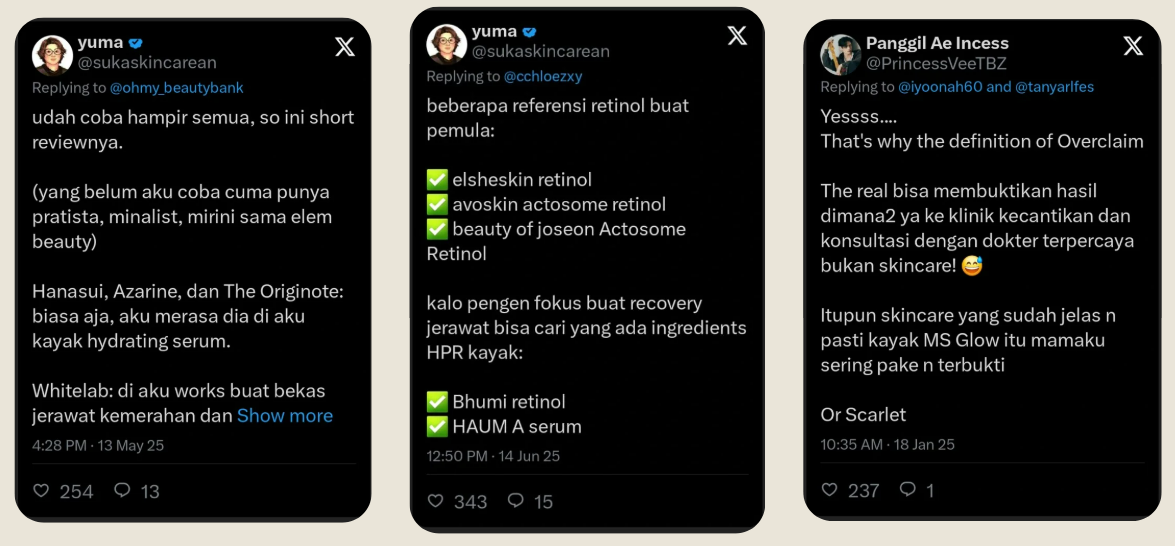

Produk dengan manfaat spesifik, seperti untuk bekas jerawat, kontrol minyak, dan coverage ringan lebih disukai konsumen, terutama jika didukung oleh testimoni nyata yang dapat membangun kepercayaan terhadap brand lokal.

In [ ]:
# Ambil 5 tweet teratas dengan sentimen negatif
top_tweet_negatif = df[df['label'] == -1].sort_values('total_engagement', ascending=False).head(5)

# Tampilkan seluruh kolom teks tanpa dipotong
pd.set_option('display.max_colwidth', None)

# Tampilkan
print("\nTop 5 Tweet Negatif dengan Engagement Tertinggi:")
print(top_tweet_negatif[['product', 'favorite_count', 'retweet_count', 'total_engagement', 'full_text', 'tweet_url']])


Top 5 Tweet Negatif dengan Engagement Tertinggi:
             product  favorite_count  retweet_count  total_engagement  \
5850          wardah             120             98               218   
3849  dear me beauty              90              3                93   
4818        scarlett              44              1                45   
2665           npure              18              0                18   
3280   studio tropik              14              0                14   

                                                                                                                                                                                                                                                                           full_text  \
5850                                                                                                                                           Sekarang lagi modelnya penipuan berkedok loker admin brand2 gede kaya wardah dan skintif

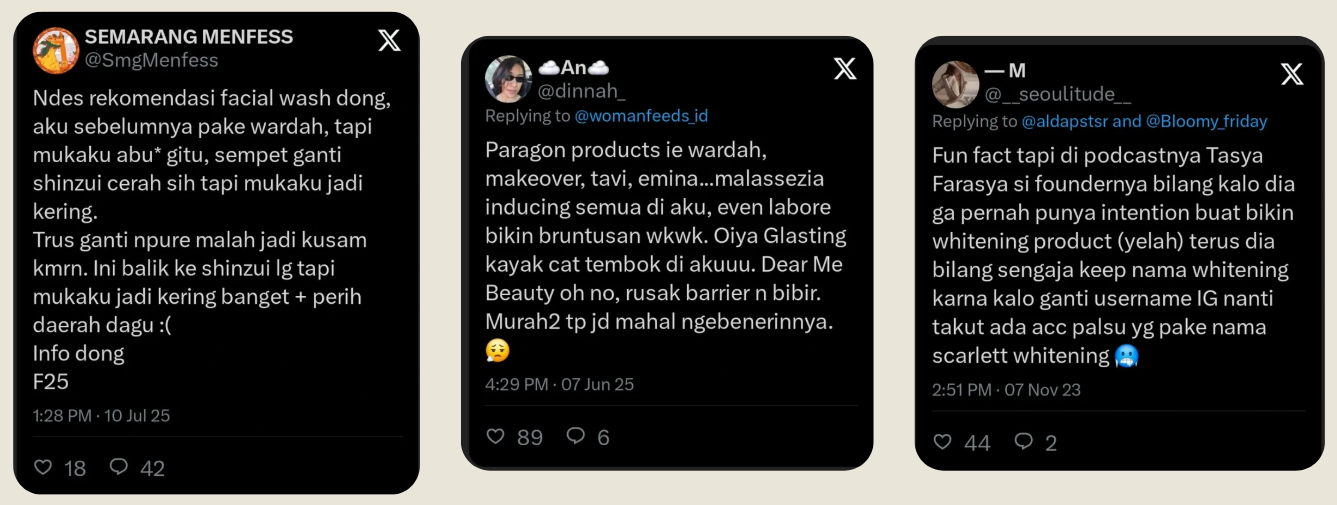

Produk yang memicu efek samping dan branding negatif cepat dikritik.  Konsumen butuh hasil nyata, bukan klaim.

##**Kesimpulan**

Skincare lokal mendapat respons beragam di media sosial. Banyak pengguna memberikan komentar positif terkait efektivitas, harga terjangkau, dan kemasan menarik. Namun, masih ada persepsi negatif terkait kandungan, klaim berlebihan, atau perilaku brand.

##**Rekomendasi**

Untuk membantu memperkuat strategi brand skincare lokal, hal-hal tersebut dapat dilakukan:
- Ikut event besar seperti JakartaXBeauty untuk tingkatkan exposure.
- Rutin adakan promo (8.8, 9.9) agar pembeli terus tertarik.
- Dorong konten ringan dari pengguna (testimoni, Q&A).
- Endorse akun yang paling sering dimention positif (womanfeeds_id, cagivity, imaginawry, ohmy_beautybank) untuk bangun kepercayaan.
- Pantau mention negatif & respons cepat via FAQ/chatbot.
- Jaga nama baik brand, termasuk sikap owner dan tim.


###Proyeksi Keuntungan
| Strategi                                                                 | Proyeksi Keuntungan                                                                 |
|--------------------------------------------------------------------------|--------------------------------------------------------------------------------------|
| Ikut event besar (JakartaXBeauty)                                       | Mengurangi biaya promosi jangka panjang karena exposure besar dalam 1 event         |
| Promo rutin tanggal kembar (8.8, 9.9)                                    | Mengurangi stok menumpuk, mempercepat perputaran barang                             |
| Konten ringan (testimoni, Q&A)                                           | Menghemat biaya produksi konten profesional dan iklan berbayar                      |
| Endorse akun dengan banyak tanggapan positif (womanfeeds_id, cagivity, imaginawry, ohmy_beautybank)       | Meminimalkan risiko kerugian dari endorsement yang tidak efektif                    |
| Respons cepat ke komentar negatif (FAQ/chatbot)                         | Mengurangi potensi boikot atau viral negatif yang bisa turunkan penjualan           |
| Jaga nama baik brand & owner                                            | Menghindari krisis reputasi yang bisa sebabkan kehilangan konsumen besar            |
